<a href="https://colab.research.google.com/github/AGiannoutsos/Image_Classification_with_Convolutional_Autoencoder/blob/main/experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!git clone https://@github.com/AGiannoutsos/Image_Classification_with_Convolutional_Autoencoder.git
%cd Image_Classification_with_Convolutional_Autoencoder/

Cloning into 'Image_Classification_with_Convolutional_Autoencoder'...
remote: Enumerating objects: 112, done.
remote: Counting objects: 100% (112/112), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 112 (delta 54), reused 71 (delta 22), pack-reused 0
Receiving objects: 100% (112/112), 15.80 MiB | 19.24 MiB/s, done.
Resolving deltas: 100% (54/54), done.
/content/Image_Classification_with_Convolutional_Autoencoder


# Experiments and research for the best model

In [14]:
import keras
import numpy as np
from model import get_Classifier, train_Classifier, get_Autoencoder, train_Autoencoder
from visualization import classifier_prediction_visualization, classifier_loss_visualization, autoencoder_visualization
from autoencoder import load_mnist
from keras.utils import to_categorical, normalize
from keras.utils.vis_utils import plot_model
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

## Loading data from dataset and convertto one hot vectors

In [15]:
# Reading training and test sets
datasetFile = "/content/Image_Classification_with_Convolutional_Autoencoder/data/train-images-idx3-ubyte"
dlabelsFile = "/content/Image_Classification_with_Convolutional_Autoencoder/data/train-labels-idx1-ubyte"
testsetFile = "/content/Image_Classification_with_Convolutional_Autoencoder/data/t10k-images-idx3-ubyte"
tlabelsFile = "/content/Image_Classification_with_Convolutional_Autoencoder/data/t10k-labels-idx1-ubyte"

train_X = load_mnist(datasetFile, type='data')[0:1000]
train_Y = load_mnist(dlabelsFile, type='labels')[0:1000]
test_X  = load_mnist(testsetFile, type='data')[0:1000]
test_Y  = load_mnist(tlabelsFile, type='labels')[0:1000]

# one hot vectors
train_Y = to_categorical(train_Y)
test_Y  = to_categorical(test_Y)

# normalize
train_X = normalize(train_X)
test_X  = normalize(test_X)
input_shape = train_X.shape[1:]
num_of_classes = train_Y.shape[1]

print(train_X.shape, train_Y.shape[1])

(1000, 28, 28, 1) 10


# Autoencoder testing

In [16]:
autoencoder_experiment_histories = []

## Small Model testing

### Default Small Model

Epoch 1/30
29/29 [==============================] - 7s 230ms/step - loss: 0.0863 - val_loss: 0.0245
Epoch 2/30
29/29 [==============================] - 7s 225ms/step - loss: 0.0217 - val_loss: 0.0217
Epoch 3/30
29/29 [==============================] - 6s 208ms/step - loss: 0.0186 - val_loss: 0.0154
Epoch 4/30
29/29 [==============================] - 6s 207ms/step - loss: 0.0145 - val_loss: 0.0130
Epoch 5/30
29/29 [==============================] - 6s 207ms/step - loss: 0.0120 - val_loss: 0.0116
Epoch 6/30
29/29 [==============================] - 6s 206ms/step - loss: 0.0106 - val_loss: 0.0118
Epoch 7/30
29/29 [==============================] - 6s 206ms/step - loss: 0.0098 - val_loss: 0.0093
Epoch 8/30
29/29 [==============================] - 6s 212ms/step - loss: 0.0092 - val_loss: 0.0115
Epoch 9/30
29/29 [==============================] - 6s 207ms/step - loss: 0.0090 - val_loss: 0.0086
Epoch 10/30
29/29 [==============================] - 6s 211ms/step - loss: 0.0083 - val_loss: 0.0080

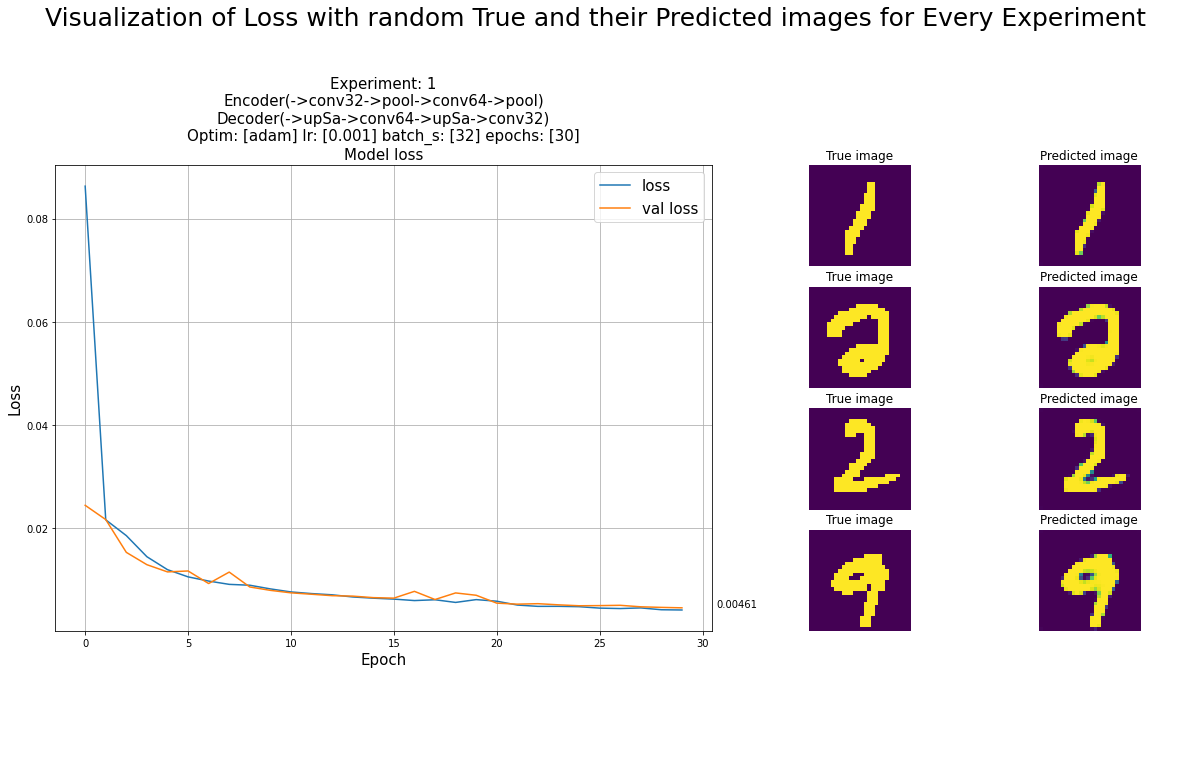

In [17]:
small_model_histories = []
small_model_info = {"encoder_layers" : [["conv", 32, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 64, (3,3)],
                                        ["pool", (2,2)]]
                    ,
                    "decoder_layers" :  [["upSample", (2,2)],
                                        ["conv", 64, (3,3)],
                                        ["upSample", (2,2)],
                                        ["conv", 32, (3,3)]]
                    ,
                    "optimizer" :       ["adam", 0.001]
                    ,
                    "batch_size":       32
                    ,
                    "epochs" :          30
                    }
# get model
small_model = get_Autoencoder(small_model_info, input_shape)
# train it
small_model_history = train_Autoencoder(small_model, small_model_info, train_X)
# save it
small_model_histories.append(small_model_history)
# plot it
_ = autoencoder_visualization([small_model_history], test_X)

Add the best compination of hyperparametrs for the medium model in the autoencoder experiments list

and save it

In [18]:
autoencoder_experiment_histories.append(small_model_histories[0])
small_model_histories[0].model.save("small_model.h5")

## Medium Model testing

### Default Medium Model

Epoch 1/30
29/29 [==============================] - 9s 302ms/step - loss: 0.1193 - val_loss: 0.0612
Epoch 2/30
29/29 [==============================] - 9s 302ms/step - loss: 0.0372 - val_loss: 0.0280
Epoch 3/30
29/29 [==============================] - 9s 300ms/step - loss: 0.0219 - val_loss: 0.0189
Epoch 4/30
29/29 [==============================] - 9s 299ms/step - loss: 0.0158 - val_loss: 0.0143
Epoch 5/30
29/29 [==============================] - 9s 300ms/step - loss: 0.0131 - val_loss: 0.0121
Epoch 6/30
29/29 [==============================] - 9s 309ms/step - loss: 0.0115 - val_loss: 0.0104
Epoch 7/30
29/29 [==============================] - 9s 301ms/step - loss: 0.0098 - val_loss: 0.0090
Epoch 8/30
29/29 [==============================] - 9s 301ms/step - loss: 0.0087 - val_loss: 0.0083
Epoch 9/30
29/29 [==============================] - 9s 299ms/step - loss: 0.0091 - val_loss: 0.0096
Epoch 10/30
29/29 [==============================] - 9s 300ms/step - loss: 0.0080 - val_loss: 0.0083

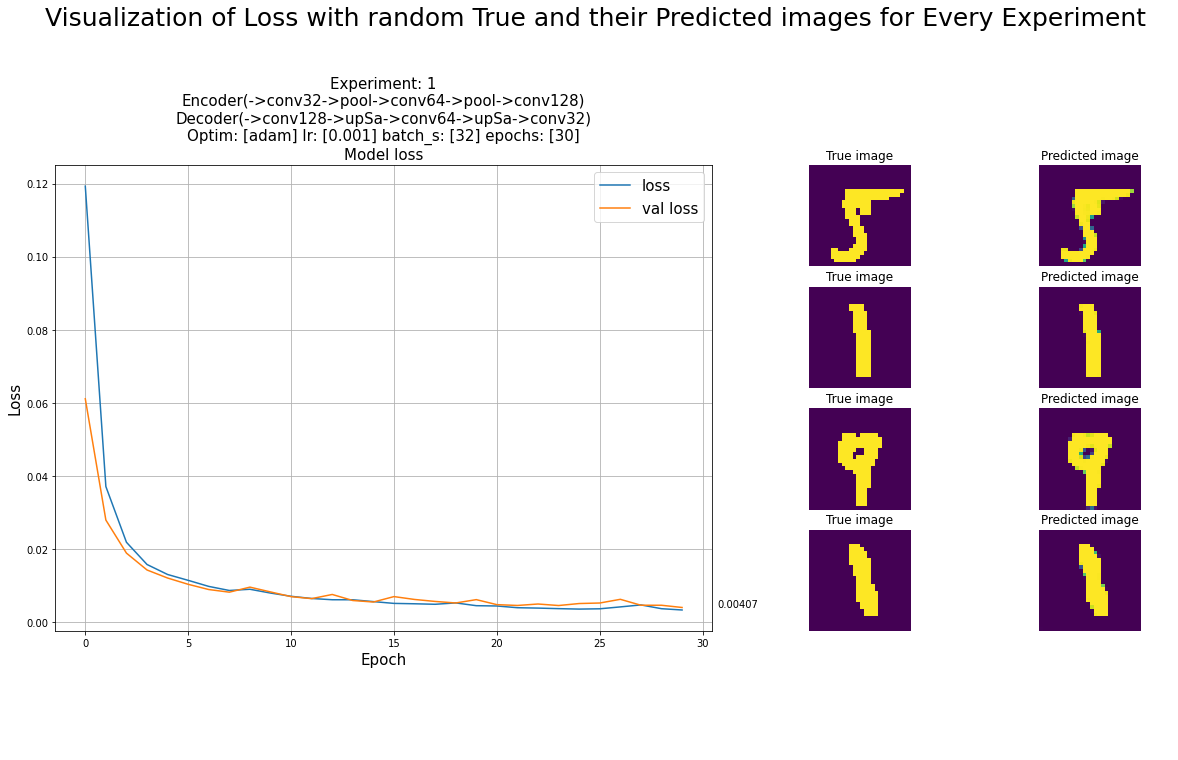

In [19]:
medium_model_histories = []
medium_model_info = {"encoder_layers" : [["conv", 32, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 64, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 128, (3,3)]]
                    ,
                    "decoder_layers" :  [["conv", 128, (3,3)],
                                        ["upSample", (2,2)],
                                        ["conv", 64, (3,3)],
                                        ["upSample", (2,2)],
                                        ["conv", 32, (3,3)]]
                    ,
                    "optimizer" :       ["adam", 0.001]
                    ,
                    "batch_size":       32
                    ,
                    "epochs" :          30
                    }
# get model
medium_model = get_Autoencoder(medium_model_info, input_shape)
# train it
medium_model_history = train_Autoencoder(medium_model, medium_model_info, train_X)
# save it
medium_model_histories.append(medium_model_history)
# plot it
_ = autoencoder_visualization([medium_model_history], test_X)

### Medium Model with smaller learning rate

Epoch 1/30
29/29 [==============================] - 9s 301ms/step - loss: 0.2225 - val_loss: 0.1765
Epoch 2/30
29/29 [==============================] - 8s 292ms/step - loss: 0.1121 - val_loss: 0.0614
Epoch 3/30
29/29 [==============================] - 8s 292ms/step - loss: 0.0497 - val_loss: 0.0448
Epoch 4/30
29/29 [==============================] - 8s 289ms/step - loss: 0.0386 - val_loss: 0.0348
Epoch 5/30
29/29 [==============================] - 8s 288ms/step - loss: 0.0312 - val_loss: 0.0282
Epoch 6/30
29/29 [==============================] - 8s 290ms/step - loss: 0.0260 - val_loss: 0.0238
Epoch 7/30
29/29 [==============================] - 8s 291ms/step - loss: 0.0223 - val_loss: 0.0215
Epoch 8/30
29/29 [==============================] - 8s 290ms/step - loss: 0.0200 - val_loss: 0.0192
Epoch 9/30
29/29 [==============================] - 9s 295ms/step - loss: 0.0184 - val_loss: 0.0181
Epoch 10/30
29/29 [==============================] - 9s 312ms/step - loss: 0.0174 - val_loss: 0.0166

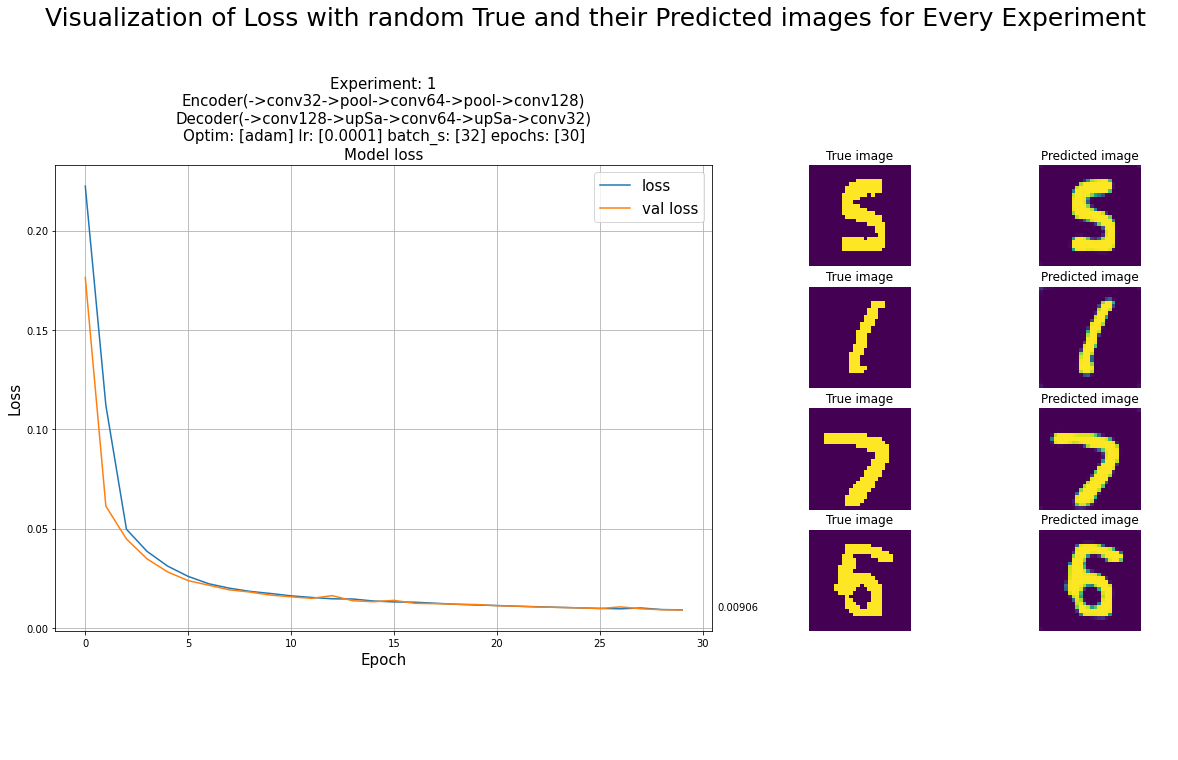

In [20]:
medium_model_info = {"encoder_layers" : [["conv", 32, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 64, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 128, (3,3)]]
                    ,
                    "decoder_layers" :  [["conv", 128, (3,3)],
                                        ["upSample", (2,2)],
                                        ["conv", 64, (3,3)],
                                        ["upSample", (2,2)],
                                        ["conv", 32, (3,3)]]
                    ,
                    "optimizer" :       ["adam", 0.0001]
                    ,
                    "batch_size":       32
                    ,
                    "epochs" :          30
                    }
# get model
medium_model = get_Autoencoder(medium_model_info, input_shape)
# train it
medium_model_history = train_Autoencoder(medium_model, medium_model_info, train_X)
# save it
medium_model_histories.append(medium_model_history)
# plot it
_ = autoencoder_visualization([medium_model_history], test_X)

### Medium Models experiments overview




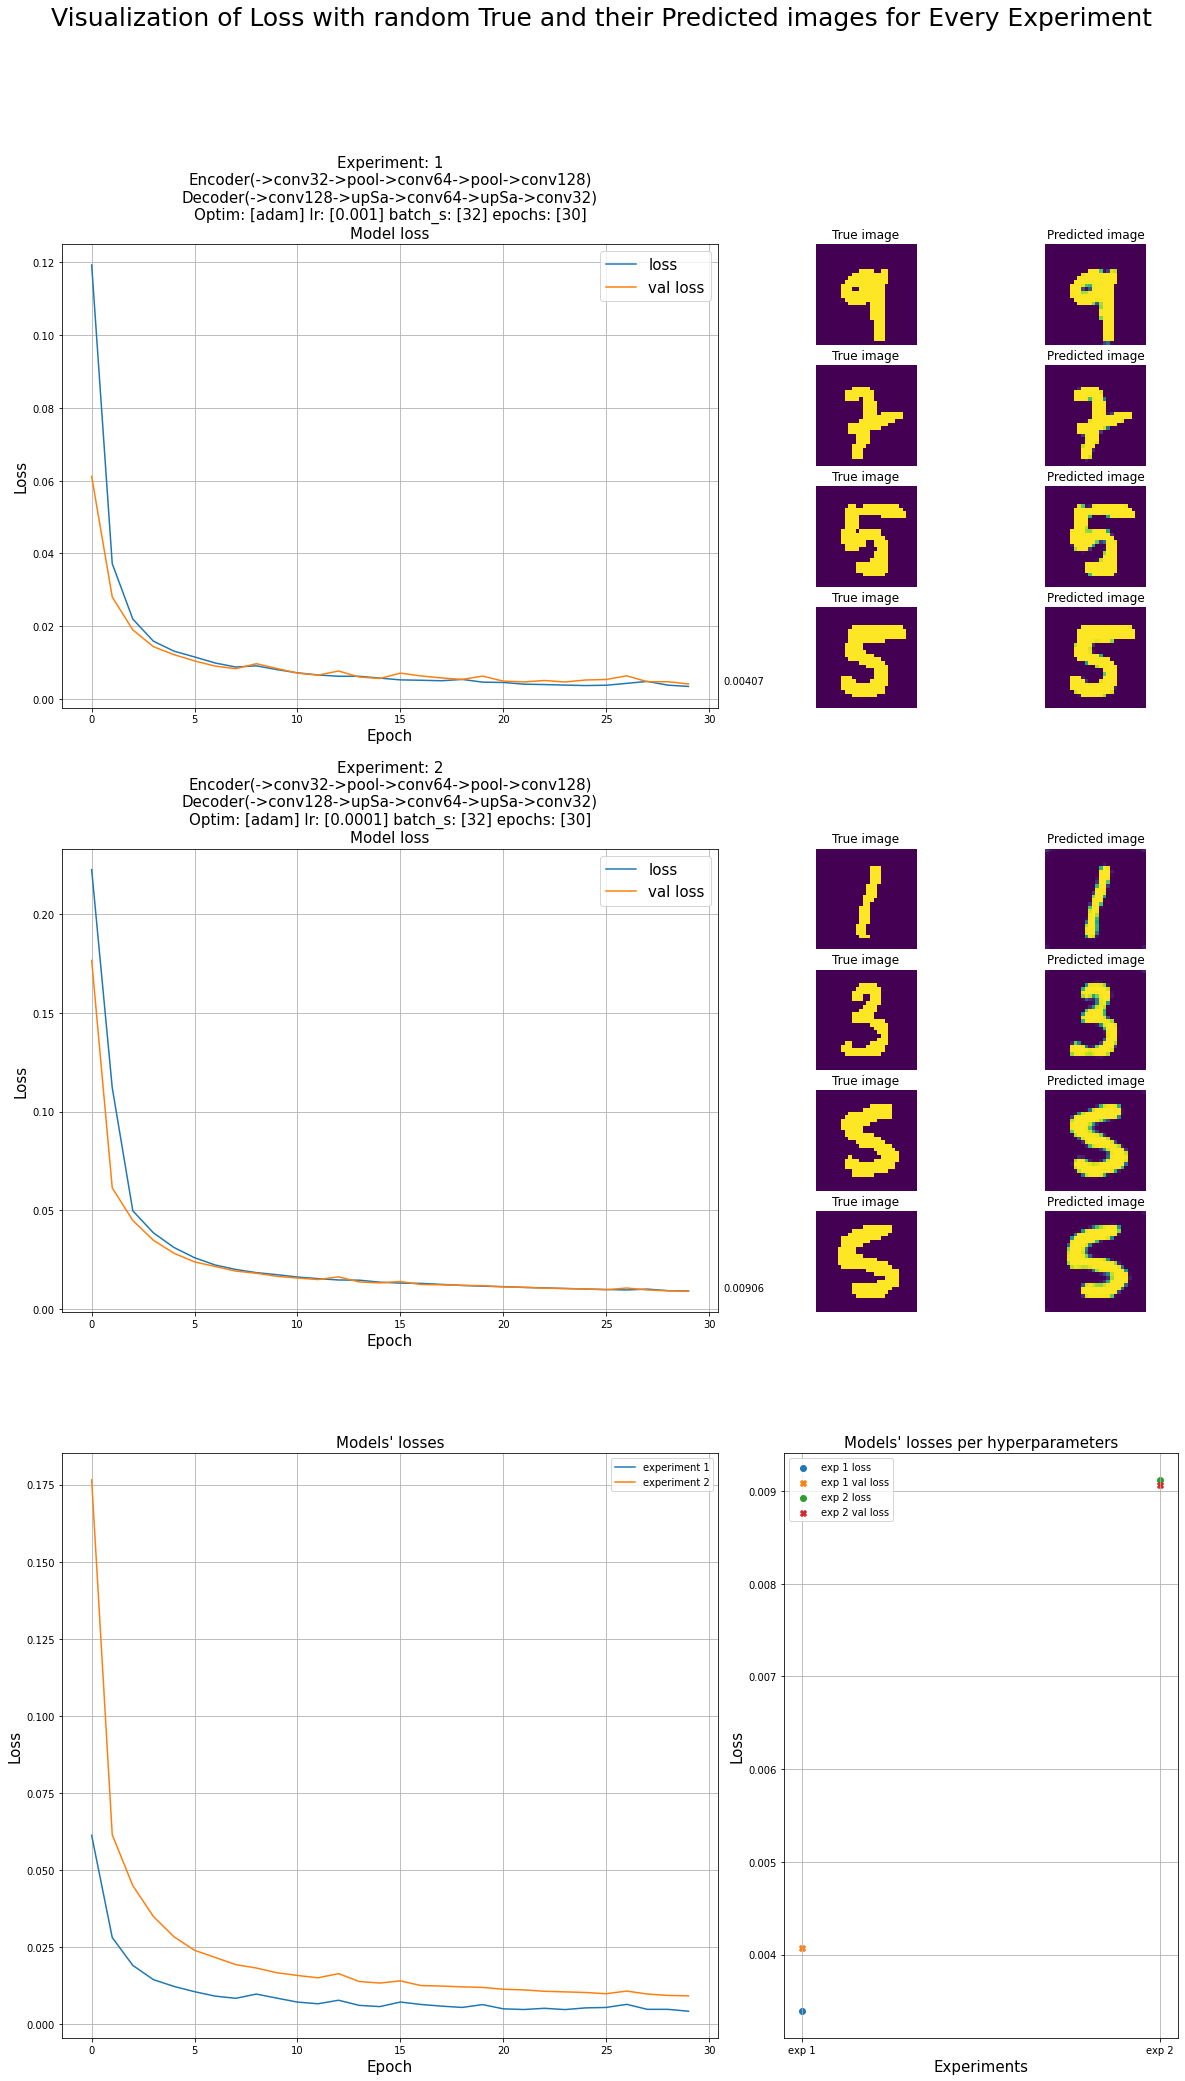

In [21]:
_ = autoencoder_visualization(medium_model_histories, test_X)

Add the best compination of hyperparametrs for the medium model in the autoencoder experiments list

and save it


In [22]:
autoencoder_experiment_histories.append(medium_model_histories[1])
medium_model_histories[1].model.save("medium_model.h5")

## Large Model testing

### Default Large Model

Epoch 1/30
29/29 [==============================] - 15s 524ms/step - loss: 0.1929 - val_loss: 0.1937
Epoch 2/30
29/29 [==============================] - 15s 522ms/step - loss: 0.1888 - val_loss: 0.1937
Epoch 3/30
29/29 [==============================] - 15s 524ms/step - loss: 0.1888 - val_loss: 0.1937
Epoch 4/30
29/29 [==============================] - 15s 530ms/step - loss: 0.1888 - val_loss: 0.1937
Epoch 5/30
29/29 [==============================] - 15s 523ms/step - loss: 0.1888 - val_loss: 0.1937
Epoch 6/30
29/29 [==============================] - 15s 532ms/step - loss: 0.1888 - val_loss: 0.1937
Epoch 7/30
29/29 [==============================] - 15s 527ms/step - loss: 0.1888 - val_loss: 0.1937
Epoch 8/30
29/29 [==============================] - 16s 546ms/step - loss: 0.1888 - val_loss: 0.1937
Epoch 9/30
29/29 [==============================] - 15s 525ms/step - loss: 0.1888 - val_loss: 0.1937
Epoch 10/30
29/29 [==============================] - 15s 526ms/step - loss: 0.1888 - val_lo

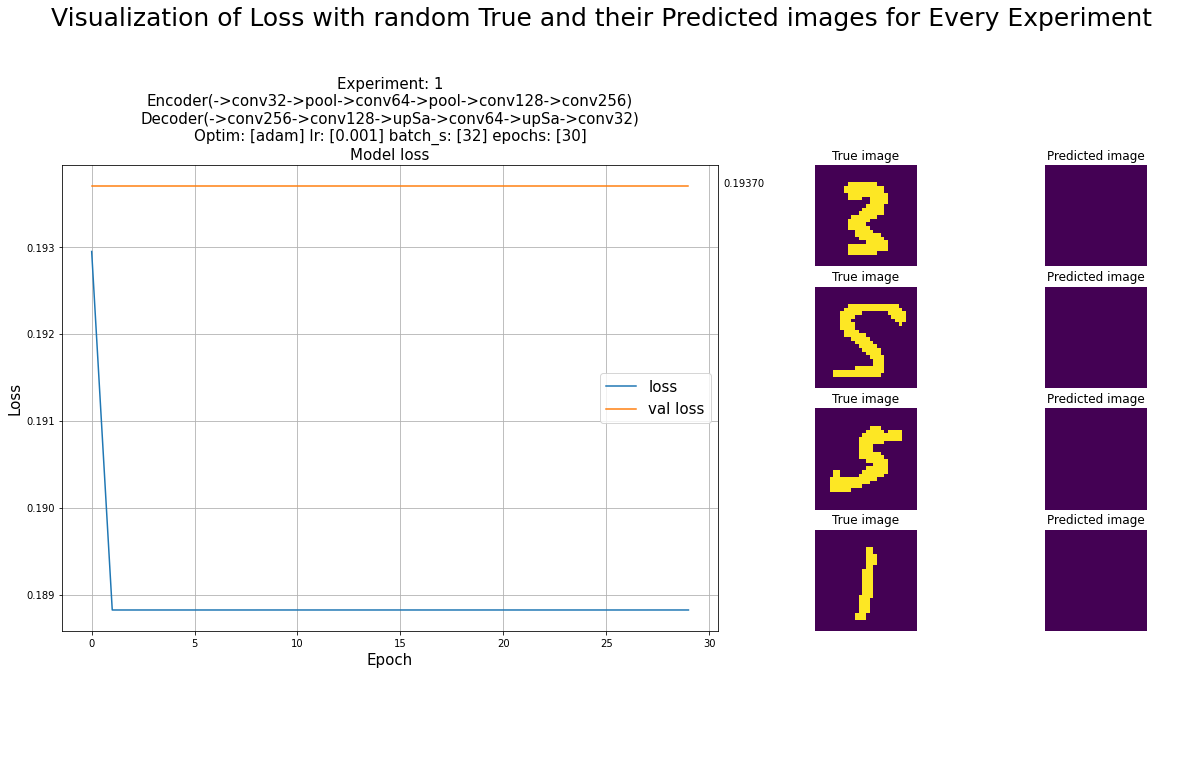

In [23]:
large_model_histories = []
large_model_info = {"encoder_layers" : [["conv", 32, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 64, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 128, (3,3)],
                                        ["conv", 256, (3,3)]]
                    ,
                    "decoder_layers" :  [["conv", 256, (3,3)],
                                         ["conv", 128, (3,3)],
                                         ["upSample", (2,2)],
                                         ["conv", 64, (3,3)],
                                         ["upSample", (2,2)],
                                         ["conv", 32, (3,3)]]
                    ,
                    "optimizer" :       ["adam", 0.001]
                    ,
                    "batch_size":       32
                    ,
                    "epochs" :          30
                    }
# get model
large_model = get_Autoencoder(large_model_info, input_shape)
# train it
large_model_history = train_Autoencoder(large_model, large_model_info, train_X)
# save it
large_model_histories.append(large_model_history)
# plot it
_ = autoencoder_visualization([large_model_history], test_X)

### Large Model with smaller learning rate

Epoch 1/30
29/29 [==============================] - 15s 526ms/step - loss: 0.1959 - val_loss: 0.1173
Epoch 2/30
29/29 [==============================] - 15s 525ms/step - loss: 0.0800 - val_loss: 0.0653
Epoch 3/30
29/29 [==============================] - 16s 538ms/step - loss: 0.0513 - val_loss: 0.0449
Epoch 4/30
29/29 [==============================] - 16s 562ms/step - loss: 0.0392 - val_loss: 0.0349
Epoch 5/30
29/29 [==============================] - 15s 520ms/step - loss: 0.0306 - val_loss: 0.0273
Epoch 6/30
29/29 [==============================] - 15s 520ms/step - loss: 0.0257 - val_loss: 0.0238
Epoch 7/30
29/29 [==============================] - 15s 530ms/step - loss: 0.0222 - val_loss: 0.0224
Epoch 8/30
29/29 [==============================] - 15s 520ms/step - loss: 0.0209 - val_loss: 0.0199
Epoch 9/30
29/29 [==============================] - 15s 524ms/step - loss: 0.0189 - val_loss: 0.0184
Epoch 10/30
29/29 [==============================] - 15s 526ms/step - loss: 0.0177 - val_lo

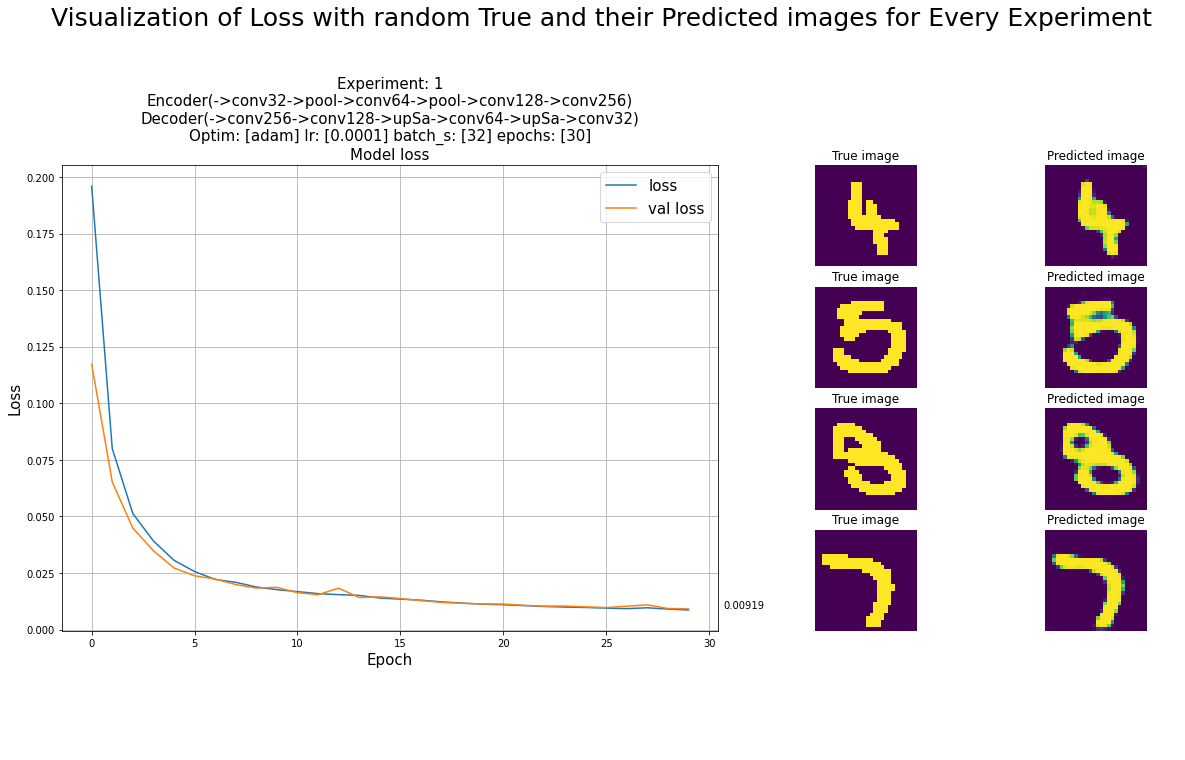

In [24]:
large_model_info = {"encoder_layers" : [["conv", 32, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 64, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 128, (3,3)],
                                        ["conv", 256, (3,3)]]
                    ,
                    "decoder_layers" :  [["conv", 256, (3,3)],
                                         ["conv", 128, (3,3)],
                                         ["upSample", (2,2)],
                                         ["conv", 64, (3,3)],
                                         ["upSample", (2,2)],
                                         ["conv", 32, (3,3)]]
                    ,
                    "optimizer" :       ["adam", 0.0001]
                    ,
                    "batch_size":       32
                    ,
                    "epochs" :          30
                    }
# get model
large_model = get_Autoencoder(large_model_info, input_shape)
# train it
large_model_history = train_Autoencoder(large_model, large_model_info, train_X)
# save it
large_model_histories.append(large_model_history)
# plot it
_ = autoencoder_visualization([large_model_history], test_X)

### Large Models experiments overview

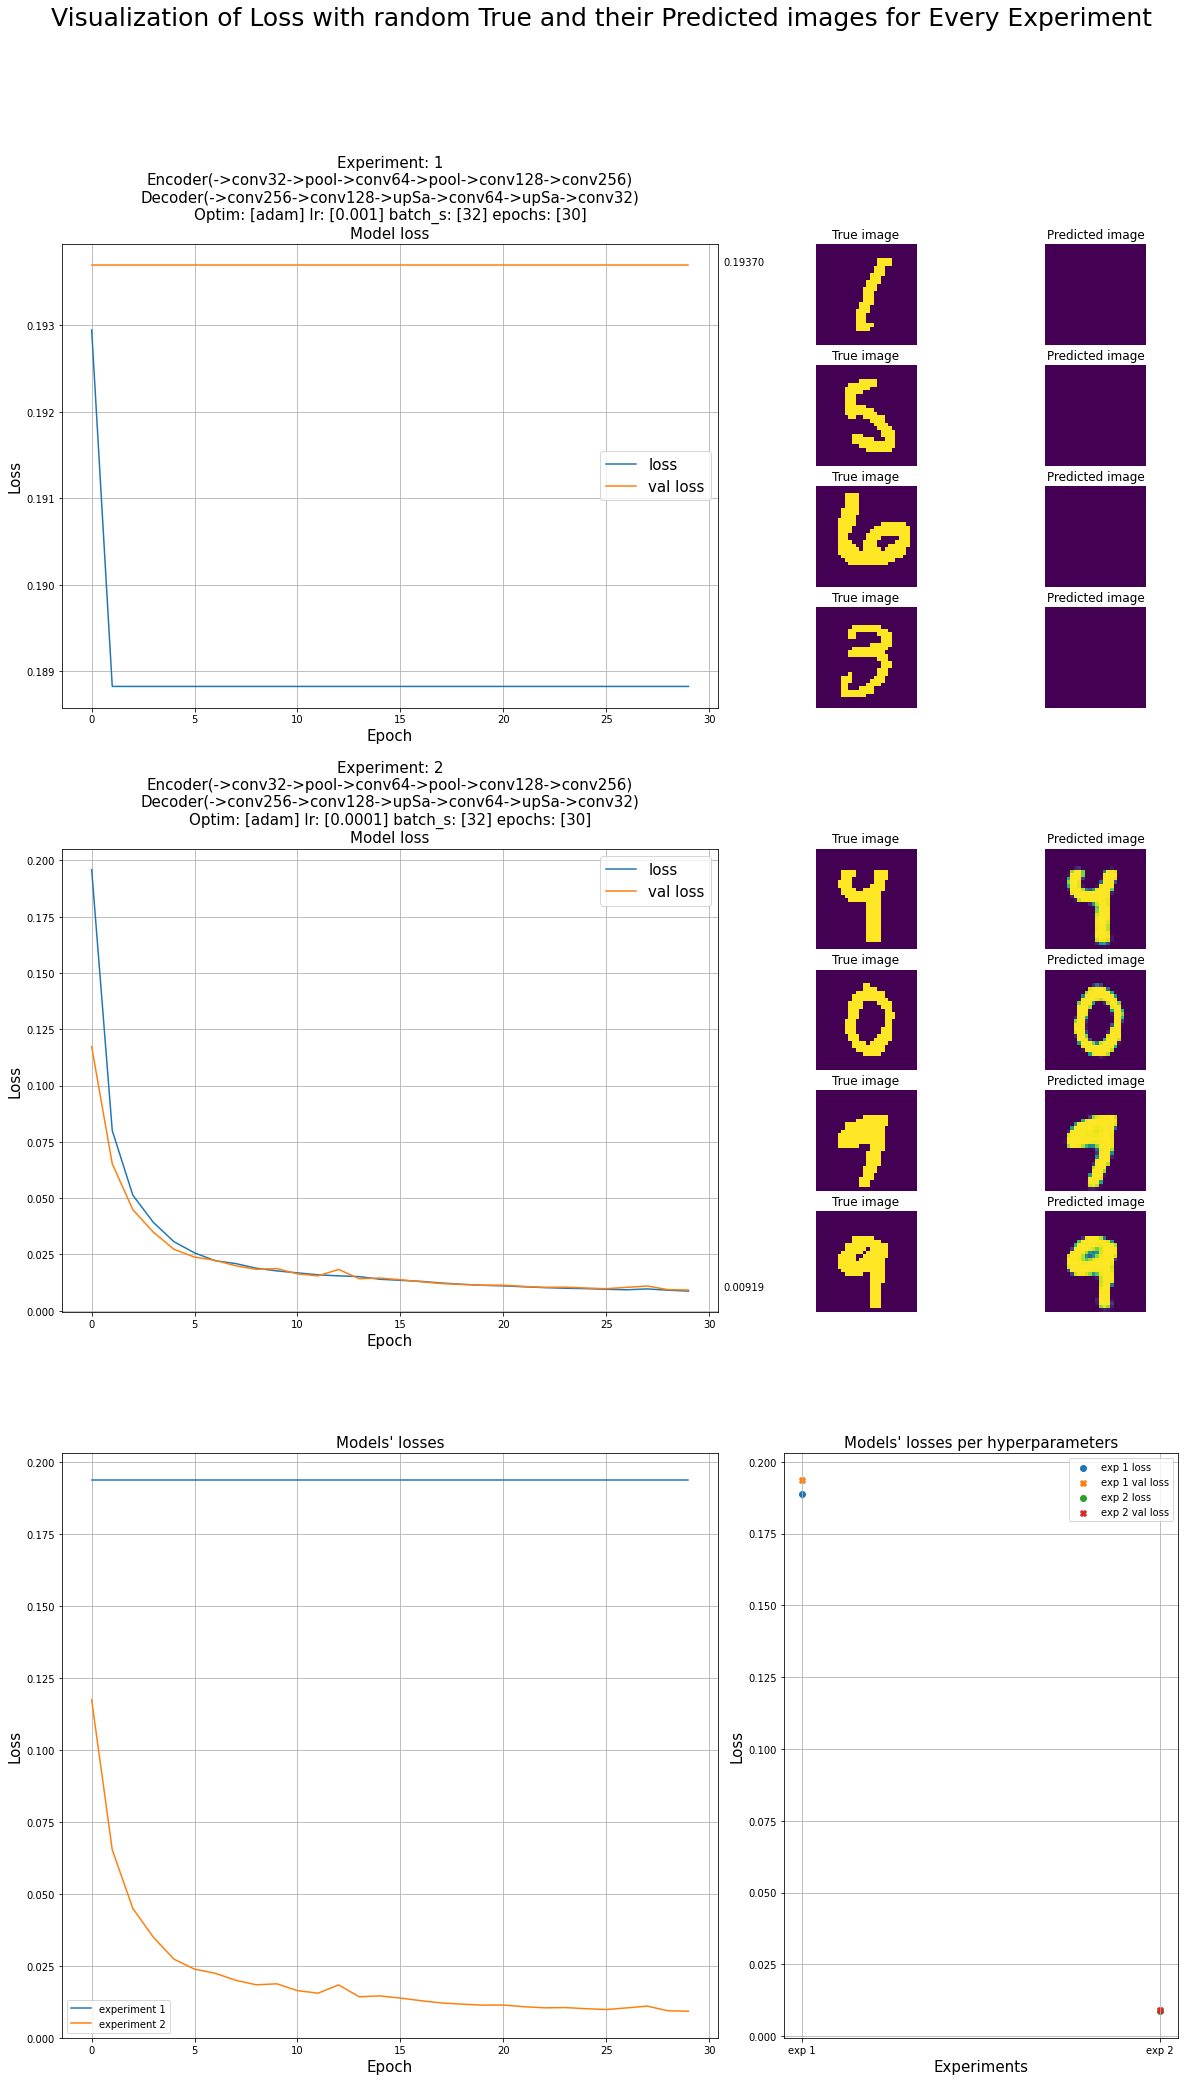

In [25]:
_ = autoencoder_visualization(large_model_histories, test_X)

Add the best compination of hyperparametrs for the large model in the autoencoder experiments list

and save it

In [26]:
autoencoder_experiment_histories.append(large_model_histories[1])
large_model_histories[1].model.save("large_model.h5")

## Autoencoder Models Overview

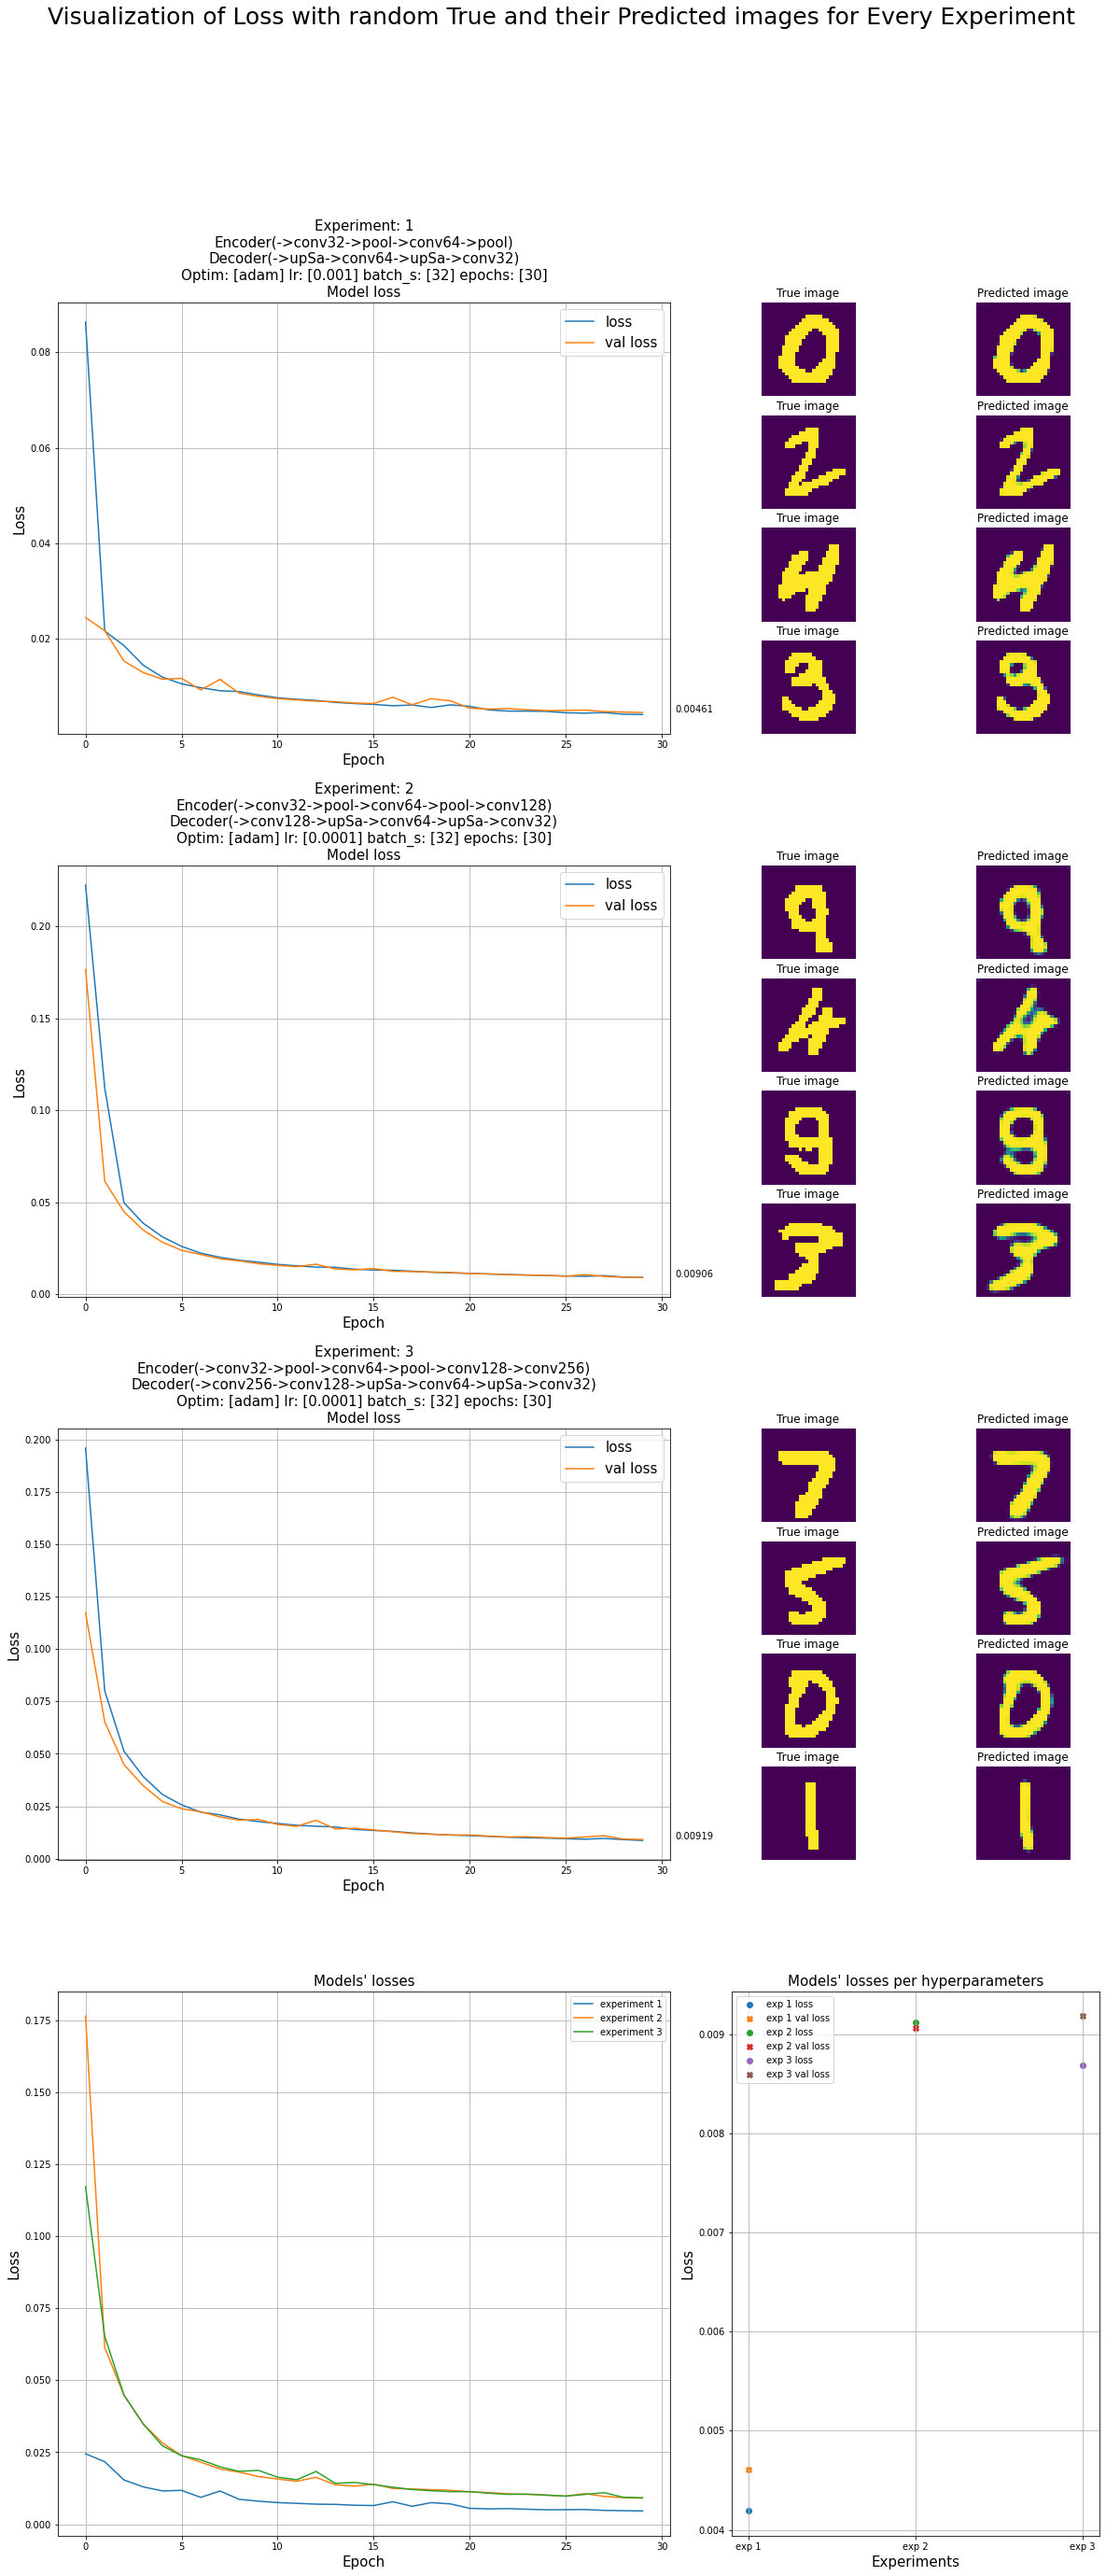

In [27]:
_ = autoencoder_visualization(autoencoder_experiment_histories, test_X)

# Classifier testing

In [33]:
classifier_experiment_histories = []

## Small Encoder + Small Dense

### Default Small Dense

Train only dense layer
Epoch 1/30
32/32 [==============================] - 2s 56ms/step - loss: 1.6756 - accuracy: 0.4540 - Precision: 0.9073 - Recall: 0.1370 - val_loss: 1.1454 - val_accuracy: 0.6200 - val_Precision: 0.8622 - val_Recall: 0.4380
Epoch 2/30
32/32 [==============================] - 1s 47ms/step - loss: 0.7119 - accuracy: 0.7730 - Precision: 0.8537 - Recall: 0.6770 - val_loss: 0.6575 - val_accuracy: 0.7810 - val_Precision: 0.8594 - val_Recall: 0.6970
Epoch 3/30
32/32 [==============================] - 2s 47ms/step - loss: 0.4014 - accuracy: 0.8840 - Precision: 0.9188 - Recall: 0.8490 - val_loss: 0.4928 - val_accuracy: 0.8360 - val_Precision: 0.8826 - val_Recall: 0.7890
Epoch 4/30
32/32 [==============================] - 1s 46ms/step - loss: 0.3273 - accuracy: 0.9010 - Precision: 0.9241 - Recall: 0.8760 - val_loss: 0.4938 - val_accuracy: 0.8370 - val_Precision: 0.8739 - val_Recall: 0.7970
Epoch 5/30
32/32 [==============================] - 2s 48ms/step - loss: 0.2352 - acc

<Figure size 432x288 with 0 Axes>

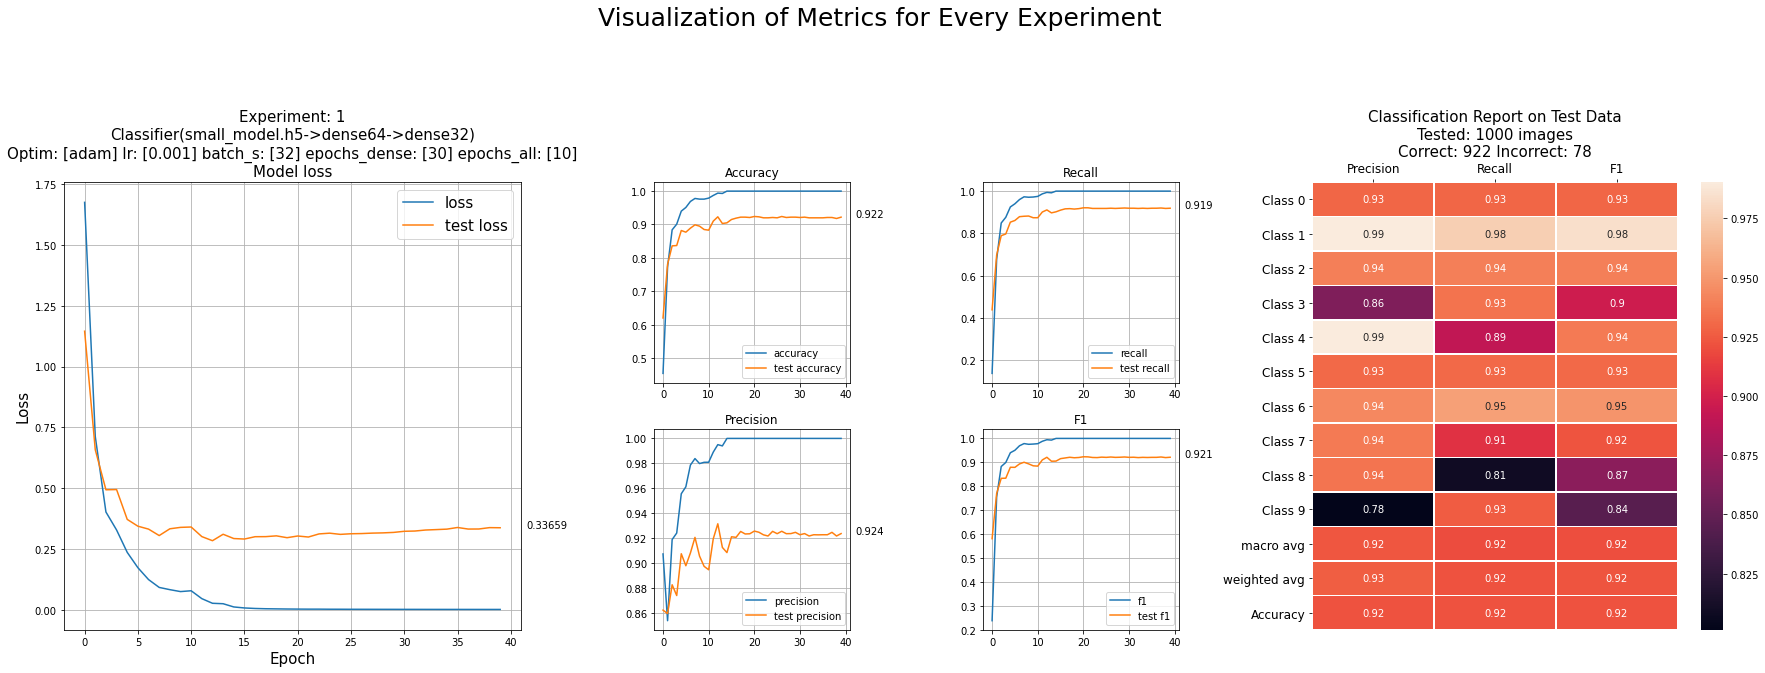

In [34]:
small_model_classifier_histories = []
small_model_classifier_info = {"dense_layers" : [["dense", 64],
                                                ["dense", 32]]
                                ,
                                "encoder_layers" : "small_model.h5"
                                ,
                                "optimizer" :   ["adam", 0.001]
                                ,
                                "dense_only_train_epochs": 30
                                ,
                                "full_train_epochs": 10
                                ,
                                "batch_size": 32
                                }

# get model
small_model_classifier = get_Classifier(small_model_classifier_info, train_X, num_of_classes)
# train it
small_model_classifier_history = train_Classifier(small_model_classifier, small_model_classifier_info, train_X, train_Y, test_X, test_Y)
# save it
small_model_classifier_histories.append(small_model_classifier_history)
# plot it
_ = classifier_loss_visualization([small_model_classifier_history])

### Adding Dropout to Dense

Train only dense layer
Epoch 1/30
32/32 [==============================] - 2s 56ms/step - loss: 2.2061 - accuracy: 0.2160 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - val_loss: 1.8892 - val_accuracy: 0.5020 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 1s 46ms/step - loss: 1.7435 - accuracy: 0.4130 - Precision: 0.8045 - Recall: 0.1440 - val_loss: 1.4448 - val_accuracy: 0.5370 - val_Precision: 0.9034 - val_Recall: 0.2150
Epoch 3/30
32/32 [==============================] - 1s 47ms/step - loss: 1.4583 - accuracy: 0.4920 - Precision: 0.8169 - Recall: 0.2900 - val_loss: 1.1797 - val_accuracy: 0.7060 - val_Precision: 0.9612 - val_Recall: 0.2970
Epoch 4/30
32/32 [==============================] - 1s 46ms/step - loss: 1.2209 - accuracy: 0.5520 - Precision: 0.8540 - Recall: 0.3860 - val_loss: 0.8351 - val_accuracy: 0.8090 - val_Precision: 0.9340 - val_Recall: 0.5240
Epoch 5/30
32/32 [==============================] - 1s 47ms/step - lo

/content/Image_Classification_with_Convolutional_Autoencoder/visualization.py:311: RuntimeWarning: invalid value encountered in true_divide
  f1_val.append(2* (pre * rec) / (pre + rec))
/content/Image_Classification_with_Convolutional_Autoencoder/visualization.py:315: RuntimeWarning: invalid value encountered in true_divide
  f1.append(2* (pre * rec) / (pre + rec))


<Figure size 432x288 with 0 Axes>

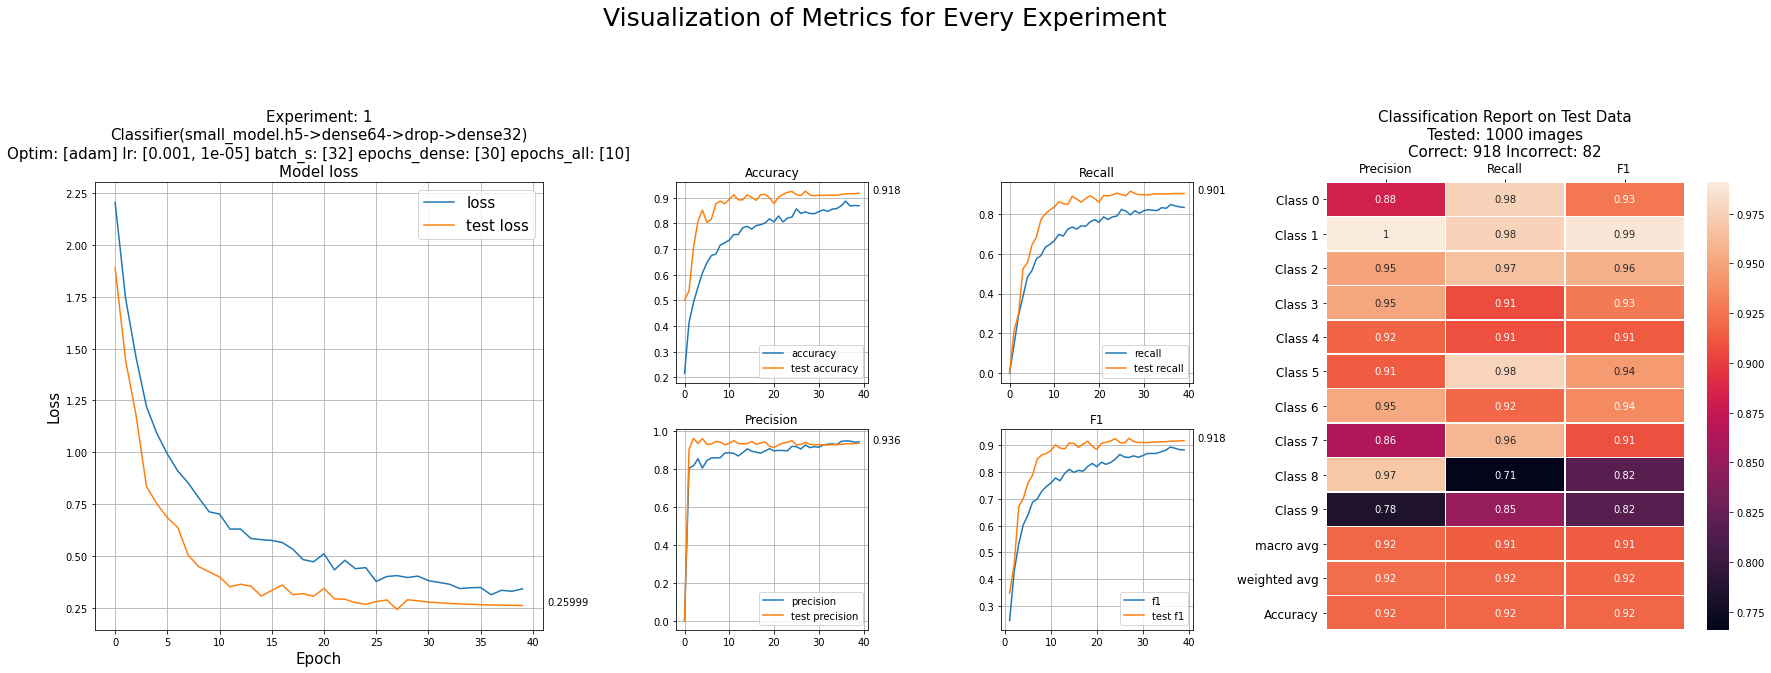

In [35]:
small_model_classifier_info = {"dense_layers" : [["dense", 64],
                                                 ["drop", 0.5],
                                                ["dense", 32]]
                                ,
                                "encoder_layers" : "small_model.h5"
                                ,
                                "optimizer" :   ["adam", 0.001, 1e-5]
                                ,
                                "dense_only_train_epochs": 30
                                ,
                                "full_train_epochs": 10
                                ,
                                "batch_size": 32
                                }


# get model
small_model_classifier = get_Classifier(small_model_classifier_info, train_X, num_of_classes)
# train it
small_model_classifier_history = train_Classifier(small_model_classifier, small_model_classifier_info, train_X, train_Y, test_X, test_Y)
# save it
small_model_classifier_histories.append(small_model_classifier_history)
# plot it
_ = classifier_loss_visualization([small_model_classifier_history])

### Small Encoder + Small Dense overview

/content/Image_Classification_with_Convolutional_Autoencoder/visualization.py:311: RuntimeWarning: invalid value encountered in true_divide
  f1_val.append(2* (pre * rec) / (pre + rec))
/content/Image_Classification_with_Convolutional_Autoencoder/visualization.py:315: RuntimeWarning: invalid value encountered in true_divide
  f1.append(2* (pre * rec) / (pre + rec))
/content/Image_Classification_with_Convolutional_Autoencoder/visualization.py:452: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax1.set_xticks(range(num_of_histories-1), np.arange(1,num_of_histories-1))
/content/Image_Classification_with_Convolutional_Autoencoder/visualization.py:463: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax2.set_xti

<Figure size 432x288 with 0 Axes>

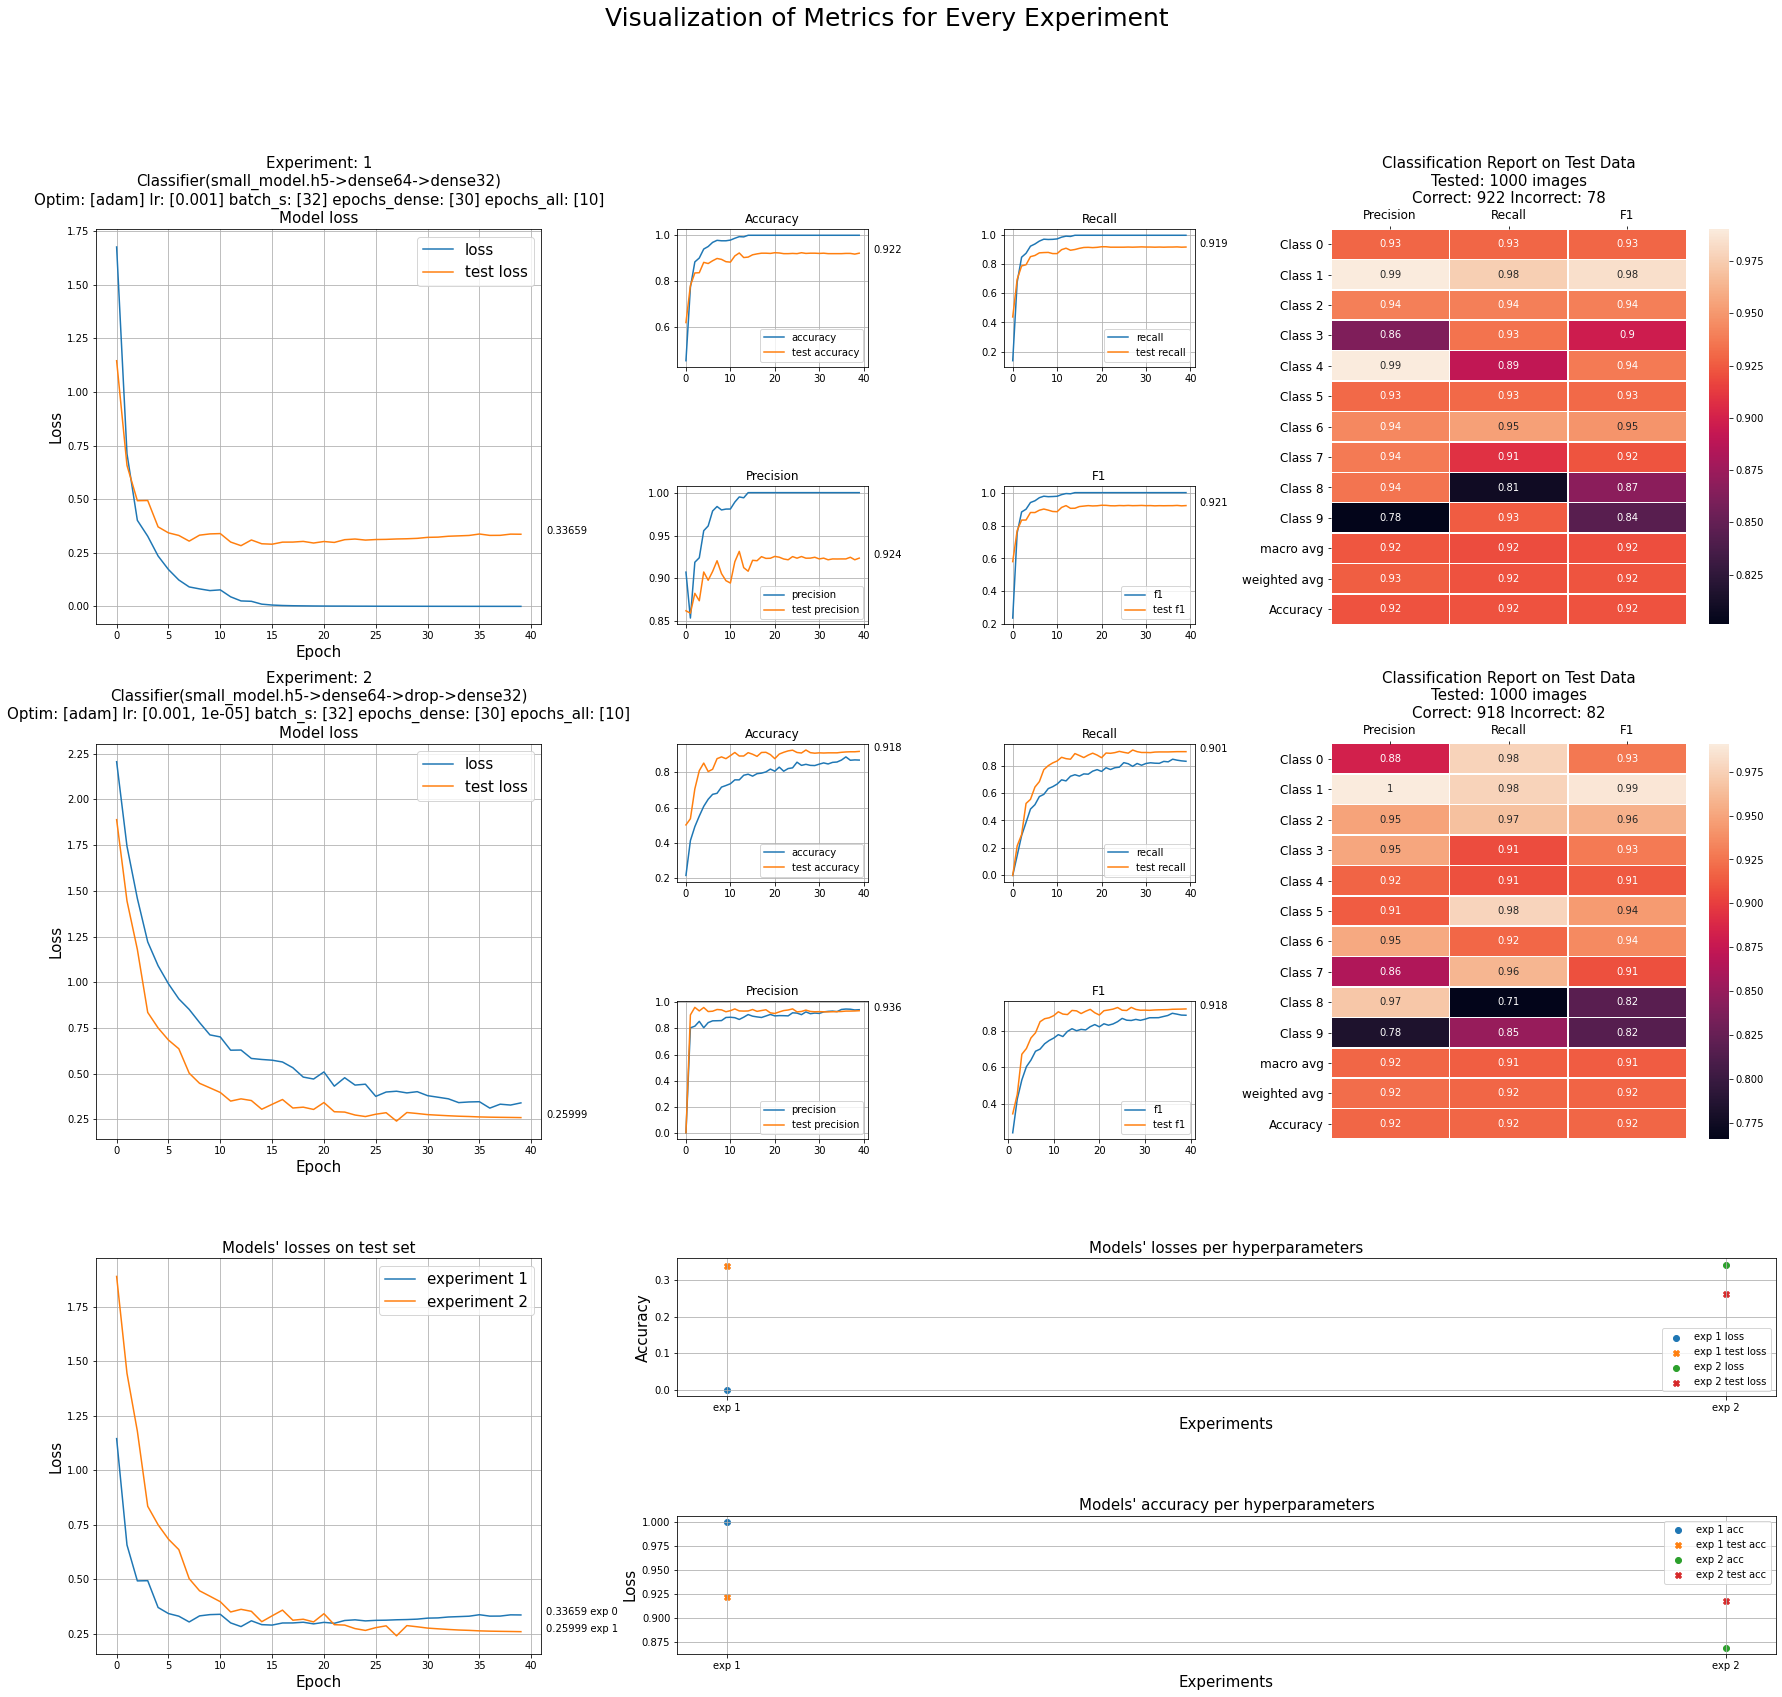

In [36]:
_ = classifier_loss_visualization(small_model_classifier_histories)

Adding the best set of hyperparametres to the classifiers experiment list 

and save it

In [37]:
classifier_experiment_histories.append(small_model_classifier_histories[1])
small_model_classifier_histories[1].model.save("small_model_classifier.h5")

## Small Encoder + Large Dense

### Default Large Dense with a little of Dropout

Train only dense layer
Epoch 1/30
32/32 [==============================] - 2s 73ms/step - loss: 1.8793 - accuracy: 0.3840 - Precision: 0.6905 - Recall: 0.0870 - val_loss: 1.0280 - val_accuracy: 0.6380 - val_Precision: 0.8057 - val_Recall: 0.5100
Epoch 2/30
32/32 [==============================] - 2s 63ms/step - loss: 0.8495 - accuracy: 0.7300 - Precision: 0.8353 - Recall: 0.6340 - val_loss: 0.5975 - val_accuracy: 0.8090 - val_Precision: 0.8814 - val_Recall: 0.7430
Epoch 3/30
32/32 [==============================] - 2s 62ms/step - loss: 0.4806 - accuracy: 0.8510 - Precision: 0.8939 - Recall: 0.8000 - val_loss: 0.3953 - val_accuracy: 0.8730 - val_Precision: 0.9036 - val_Recall: 0.8440
Epoch 4/30
32/32 [==============================] - 2s 63ms/step - loss: 0.3668 - accuracy: 0.8880 - Precision: 0.9223 - Recall: 0.8550 - val_loss: 0.3417 - val_accuracy: 0.8910 - val_Precision: 0.9242 - val_Recall: 0.8660
Epoch 5/30
32/32 [==============================] - 2s 62ms/step - loss: 0.2981 - acc

<Figure size 432x288 with 0 Axes>

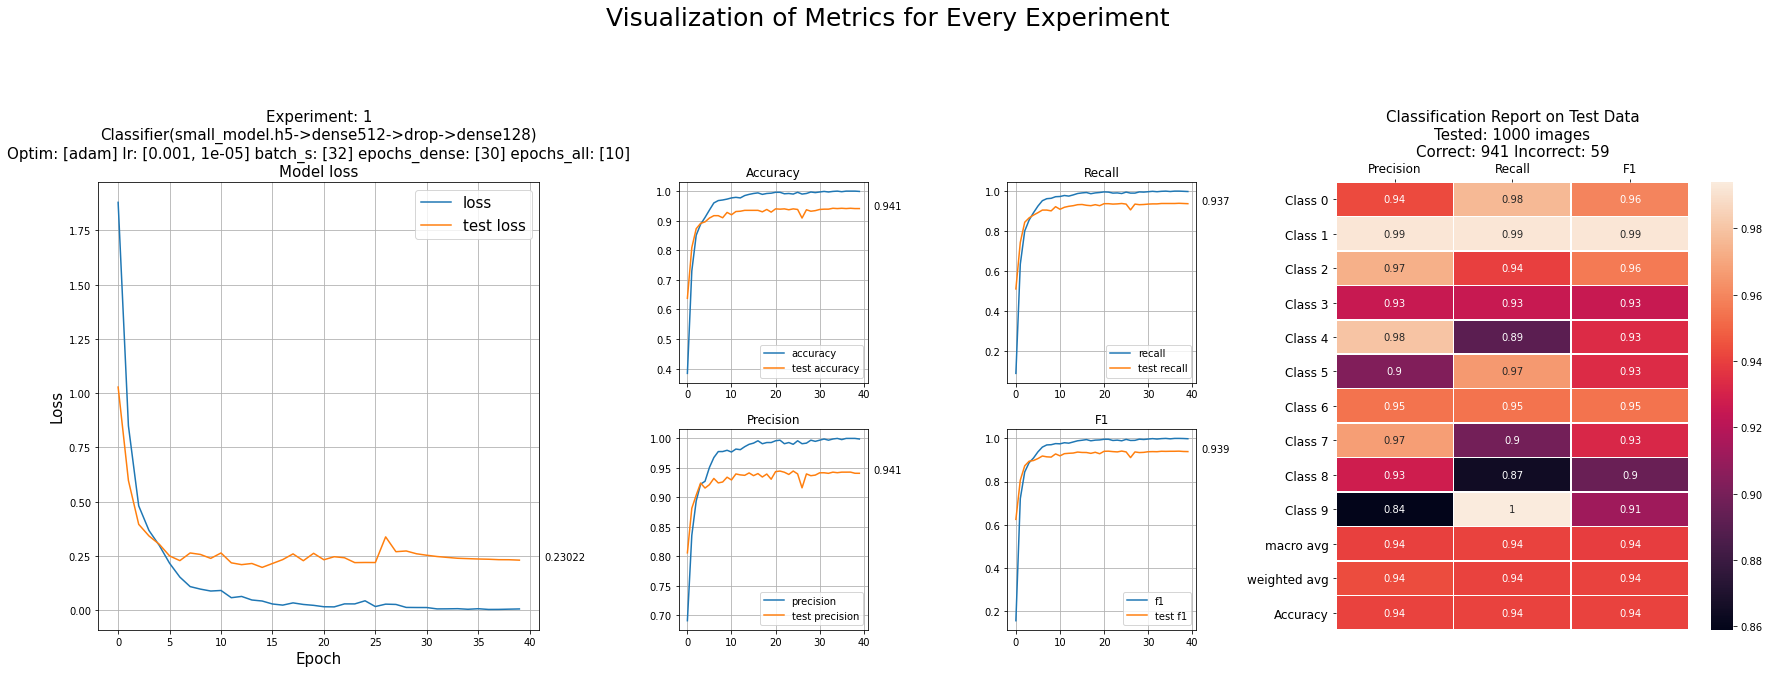

In [38]:
large_model_classifier_histories = []
large_model_classifier_info = {"dense_layers" : [["dense", 512],
                                                 ["drop", 0.5],
                                                ["dense", 128]]
                                ,
                                "encoder_layers" : "small_model.h5"
                                ,
                                "optimizer" :   ["adam", 0.001, 1e-5]
                                ,
                                "dense_only_train_epochs": 30
                                ,
                                "full_train_epochs": 10
                                ,
                                "batch_size": 32
                                }


# get model
large_model_classifier = get_Classifier(large_model_classifier_info, train_X, num_of_classes)
# train it
large_model_classifier_history = train_Classifier(large_model_classifier, large_model_classifier_info, train_X, train_Y, test_X, test_Y)
# save it
large_model_classifier_histories.append(large_model_classifier_history)
# plot it
_ = classifier_loss_visualization([large_model_classifier_history])

### Adding more Dropout

Train only dense layer
Epoch 1/30
32/32 [==============================] - 2s 75ms/step - loss: 2.8413 - accuracy: 0.1090 - Precision: 0.1069 - Recall: 0.0170 - val_loss: 2.2858 - val_accuracy: 0.2900 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 2s 64ms/step - loss: 2.2534 - accuracy: 0.1610 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - val_loss: 2.2161 - val_accuracy: 0.2800 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 2s 63ms/step - loss: 2.1243 - accuracy: 0.2310 - Precision: 0.7692 - Recall: 0.0100 - val_loss: 1.9497 - val_accuracy: 0.5060 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 2s 64ms/step - loss: 1.9406 - accuracy: 0.3050 - Precision: 0.6988 - Recall: 0.0580 - val_loss: 1.6386 - val_accuracy: 0.5830 - val_Precision: 1.0000 - val_Recall: 0.1090
Epoch 5/30
32/32 [==============================] - 2

/content/Image_Classification_with_Convolutional_Autoencoder/visualization.py:311: RuntimeWarning: invalid value encountered in true_divide
  f1_val.append(2* (pre * rec) / (pre + rec))
/content/Image_Classification_with_Convolutional_Autoencoder/visualization.py:315: RuntimeWarning: invalid value encountered in true_divide
  f1.append(2* (pre * rec) / (pre + rec))


<Figure size 432x288 with 0 Axes>

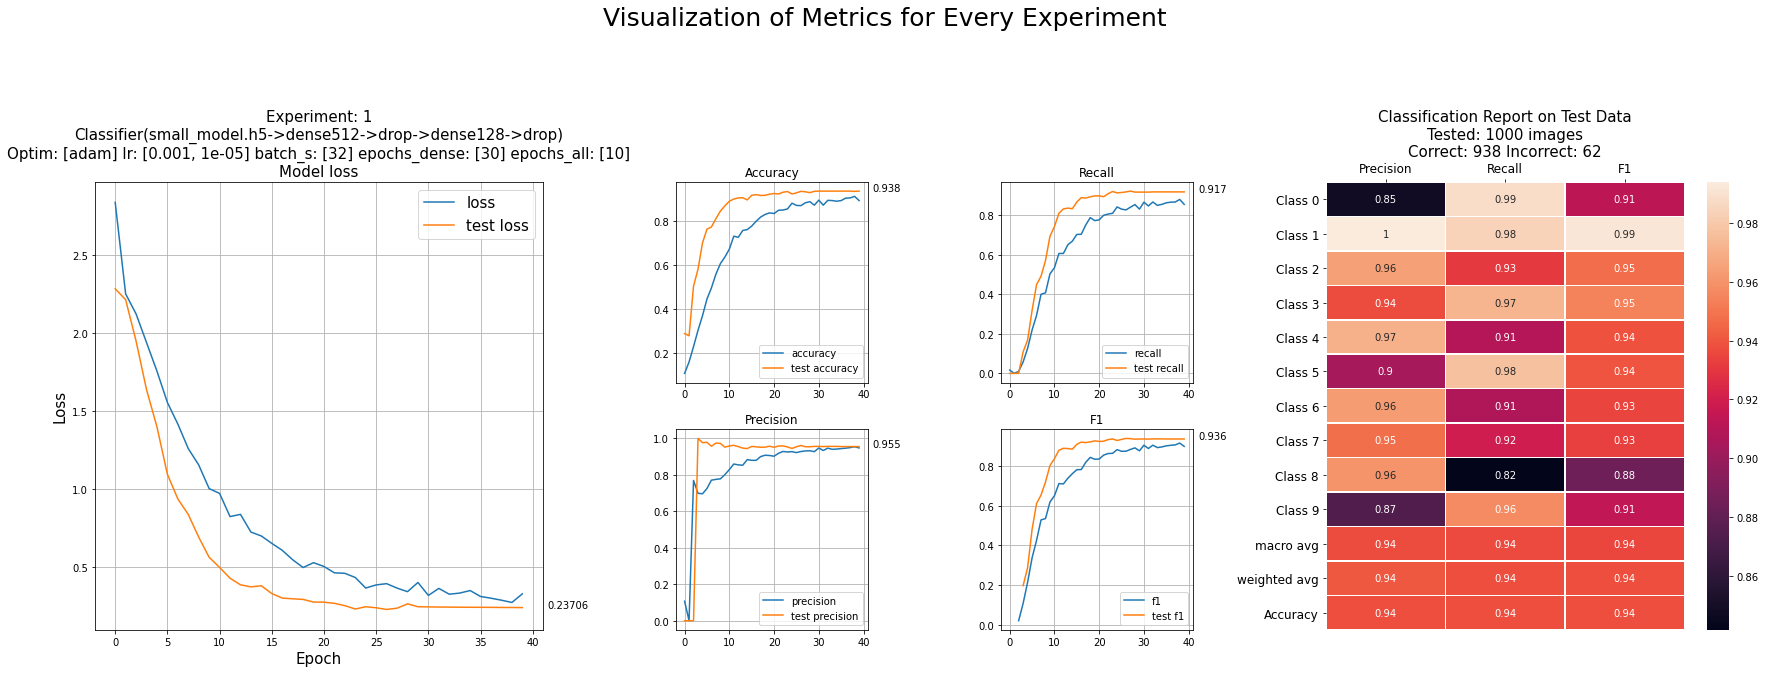

In [39]:
large_model_classifier_info = {"dense_layers" : [["dense", 512],
                                                 ["drop", 0.8],
                                                ["dense", 128],
                                                 ["drop", 0.7]]
                                ,
                                "encoder_layers" : "small_model.h5"
                                ,
                                "optimizer" :   ["adam", 0.001, 1e-5]
                                ,
                                "dense_only_train_epochs": 30
                                ,
                                "full_train_epochs": 10
                                ,
                                "batch_size": 32
                                }


# get model
large_model_classifier = get_Classifier(large_model_classifier_info, train_X, num_of_classes)
# train it
large_model_classifier_history = train_Classifier(large_model_classifier, large_model_classifier_info, train_X, train_Y, test_X, test_Y)
# save it
large_model_classifier_histories.append(large_model_classifier_history)
# plot it
_ = classifier_loss_visualization([large_model_classifier_history])

### Small Encoder + Large Dense overview

/content/Image_Classification_with_Convolutional_Autoencoder/visualization.py:311: RuntimeWarning: invalid value encountered in true_divide
  f1_val.append(2* (pre * rec) / (pre + rec))
/content/Image_Classification_with_Convolutional_Autoencoder/visualization.py:315: RuntimeWarning: invalid value encountered in true_divide
  f1.append(2* (pre * rec) / (pre + rec))
/content/Image_Classification_with_Convolutional_Autoencoder/visualization.py:452: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax1.set_xticks(range(num_of_histories-1), np.arange(1,num_of_histories-1))
/content/Image_Classification_with_Convolutional_Autoencoder/visualization.py:463: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax2.set_xti

<Figure size 432x288 with 0 Axes>

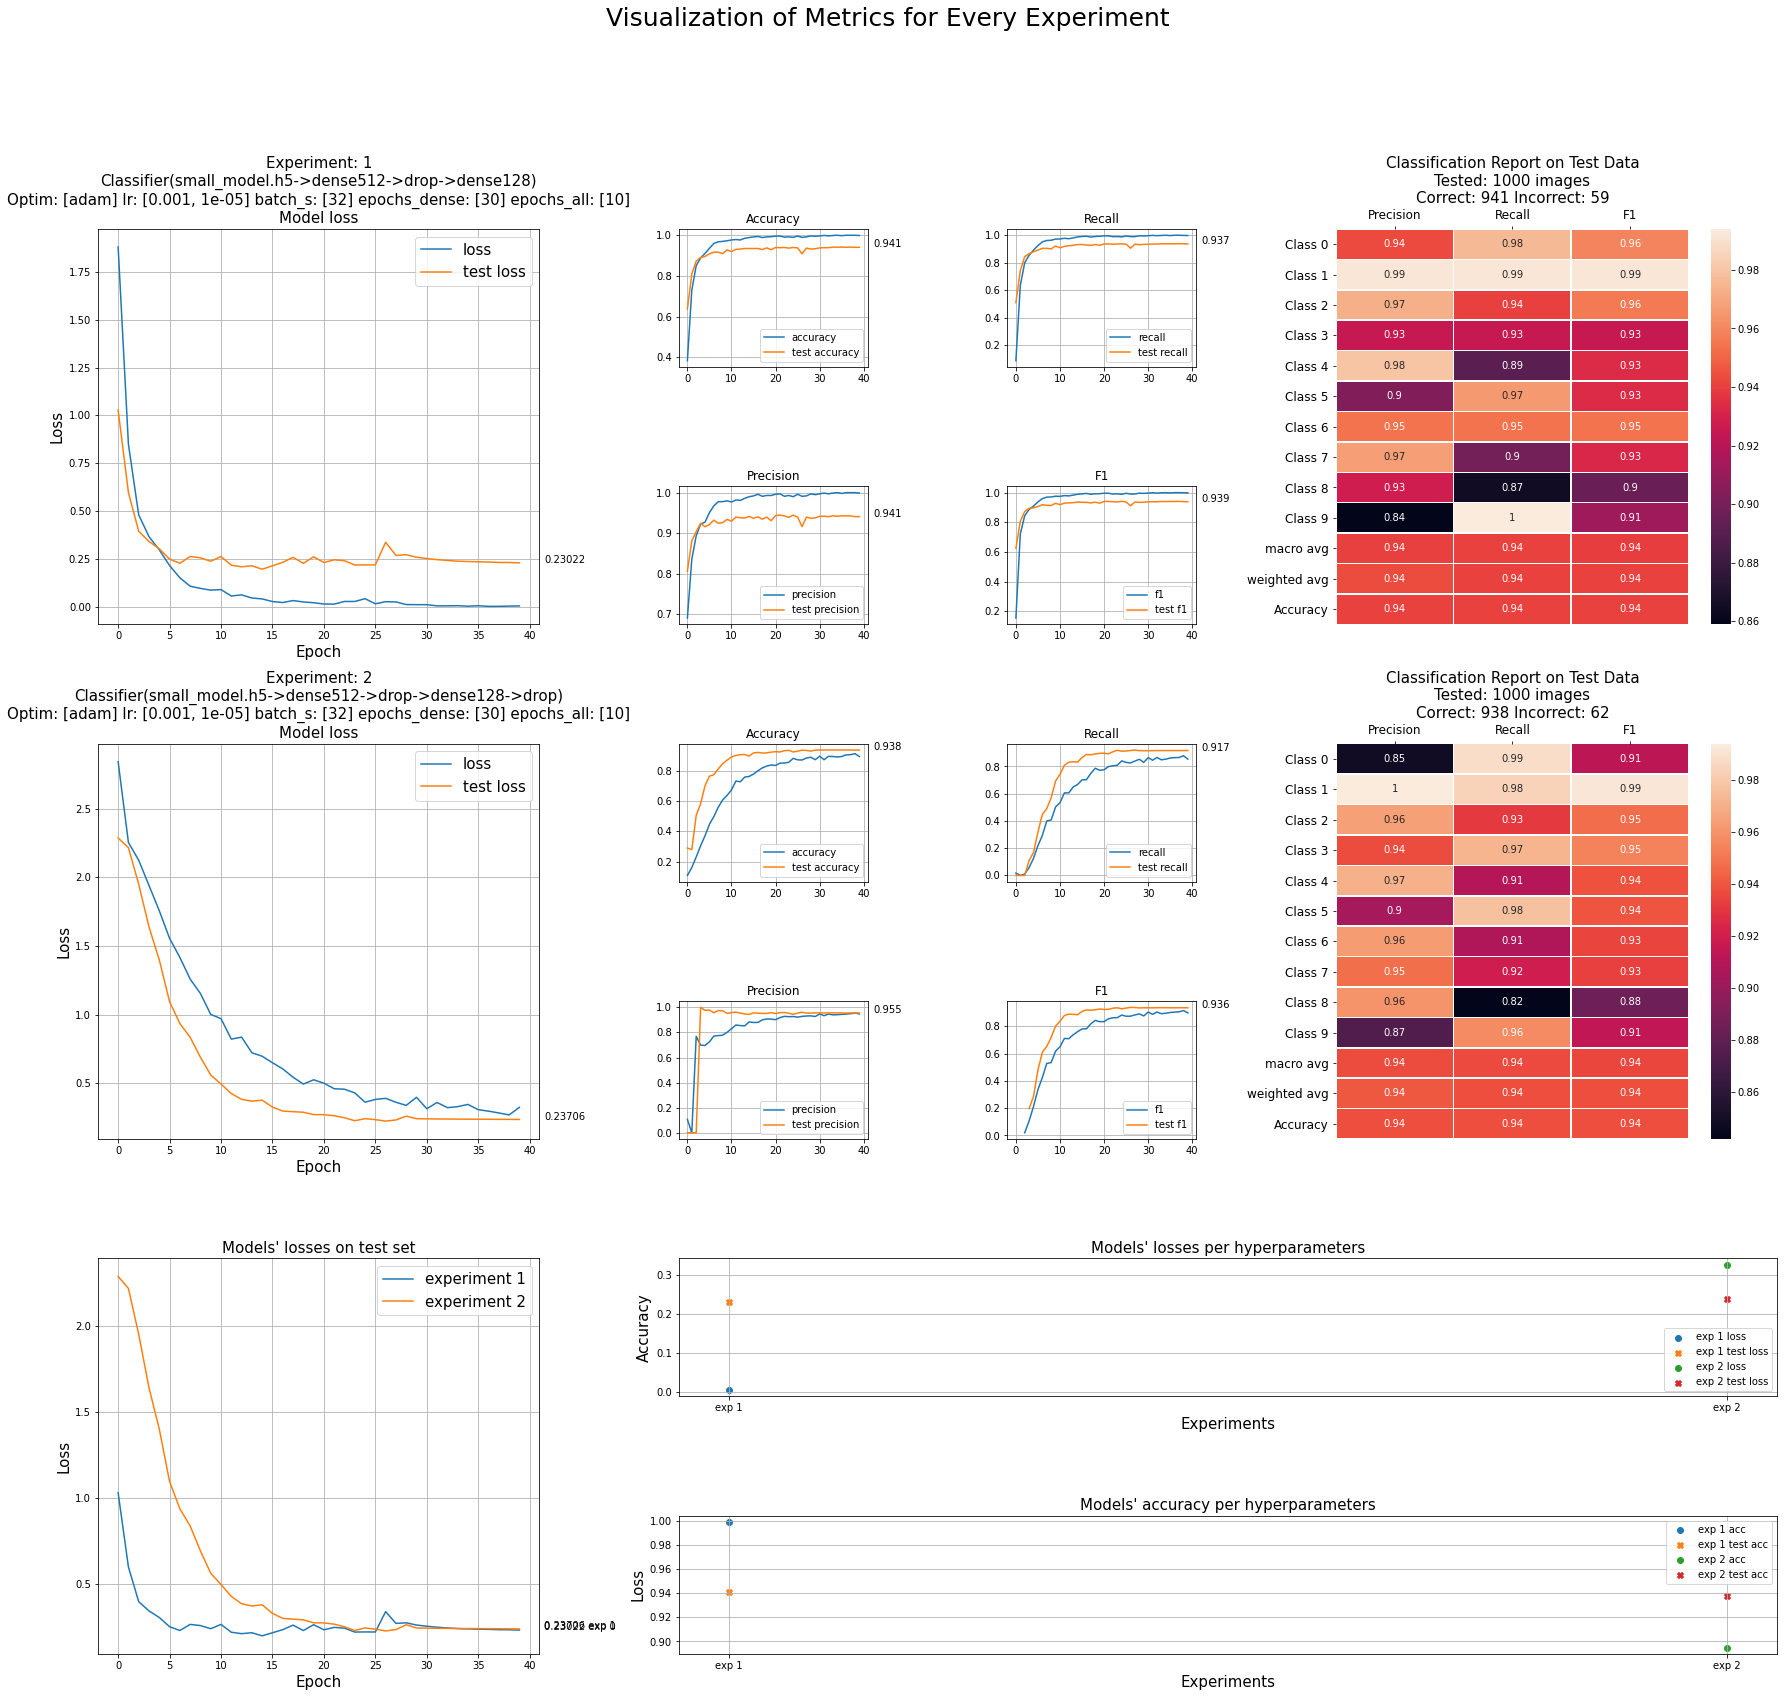

In [40]:
_ = classifier_loss_visualization(large_model_classifier_histories)

Adding the best set of hyperparametres to the classifiers experiment list 

and save it

In [41]:
classifier_experiment_histories.append(large_model_classifier_histories[1])
large_model_classifier_histories[1].model.save("large_model_classifier.h5")

## Final Classifier Overview

/content/Image_Classification_with_Convolutional_Autoencoder/visualization.py:311: RuntimeWarning: invalid value encountered in true_divide
  f1_val.append(2* (pre * rec) / (pre + rec))
/content/Image_Classification_with_Convolutional_Autoencoder/visualization.py:315: RuntimeWarning: invalid value encountered in true_divide
  f1.append(2* (pre * rec) / (pre + rec))
/content/Image_Classification_with_Convolutional_Autoencoder/visualization.py:452: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax1.set_xticks(range(num_of_histories-1), np.arange(1,num_of_histories-1))
/content/Image_Classification_with_Convolutional_Autoencoder/visualization.py:463: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax2.set_xti

<Figure size 432x288 with 0 Axes>

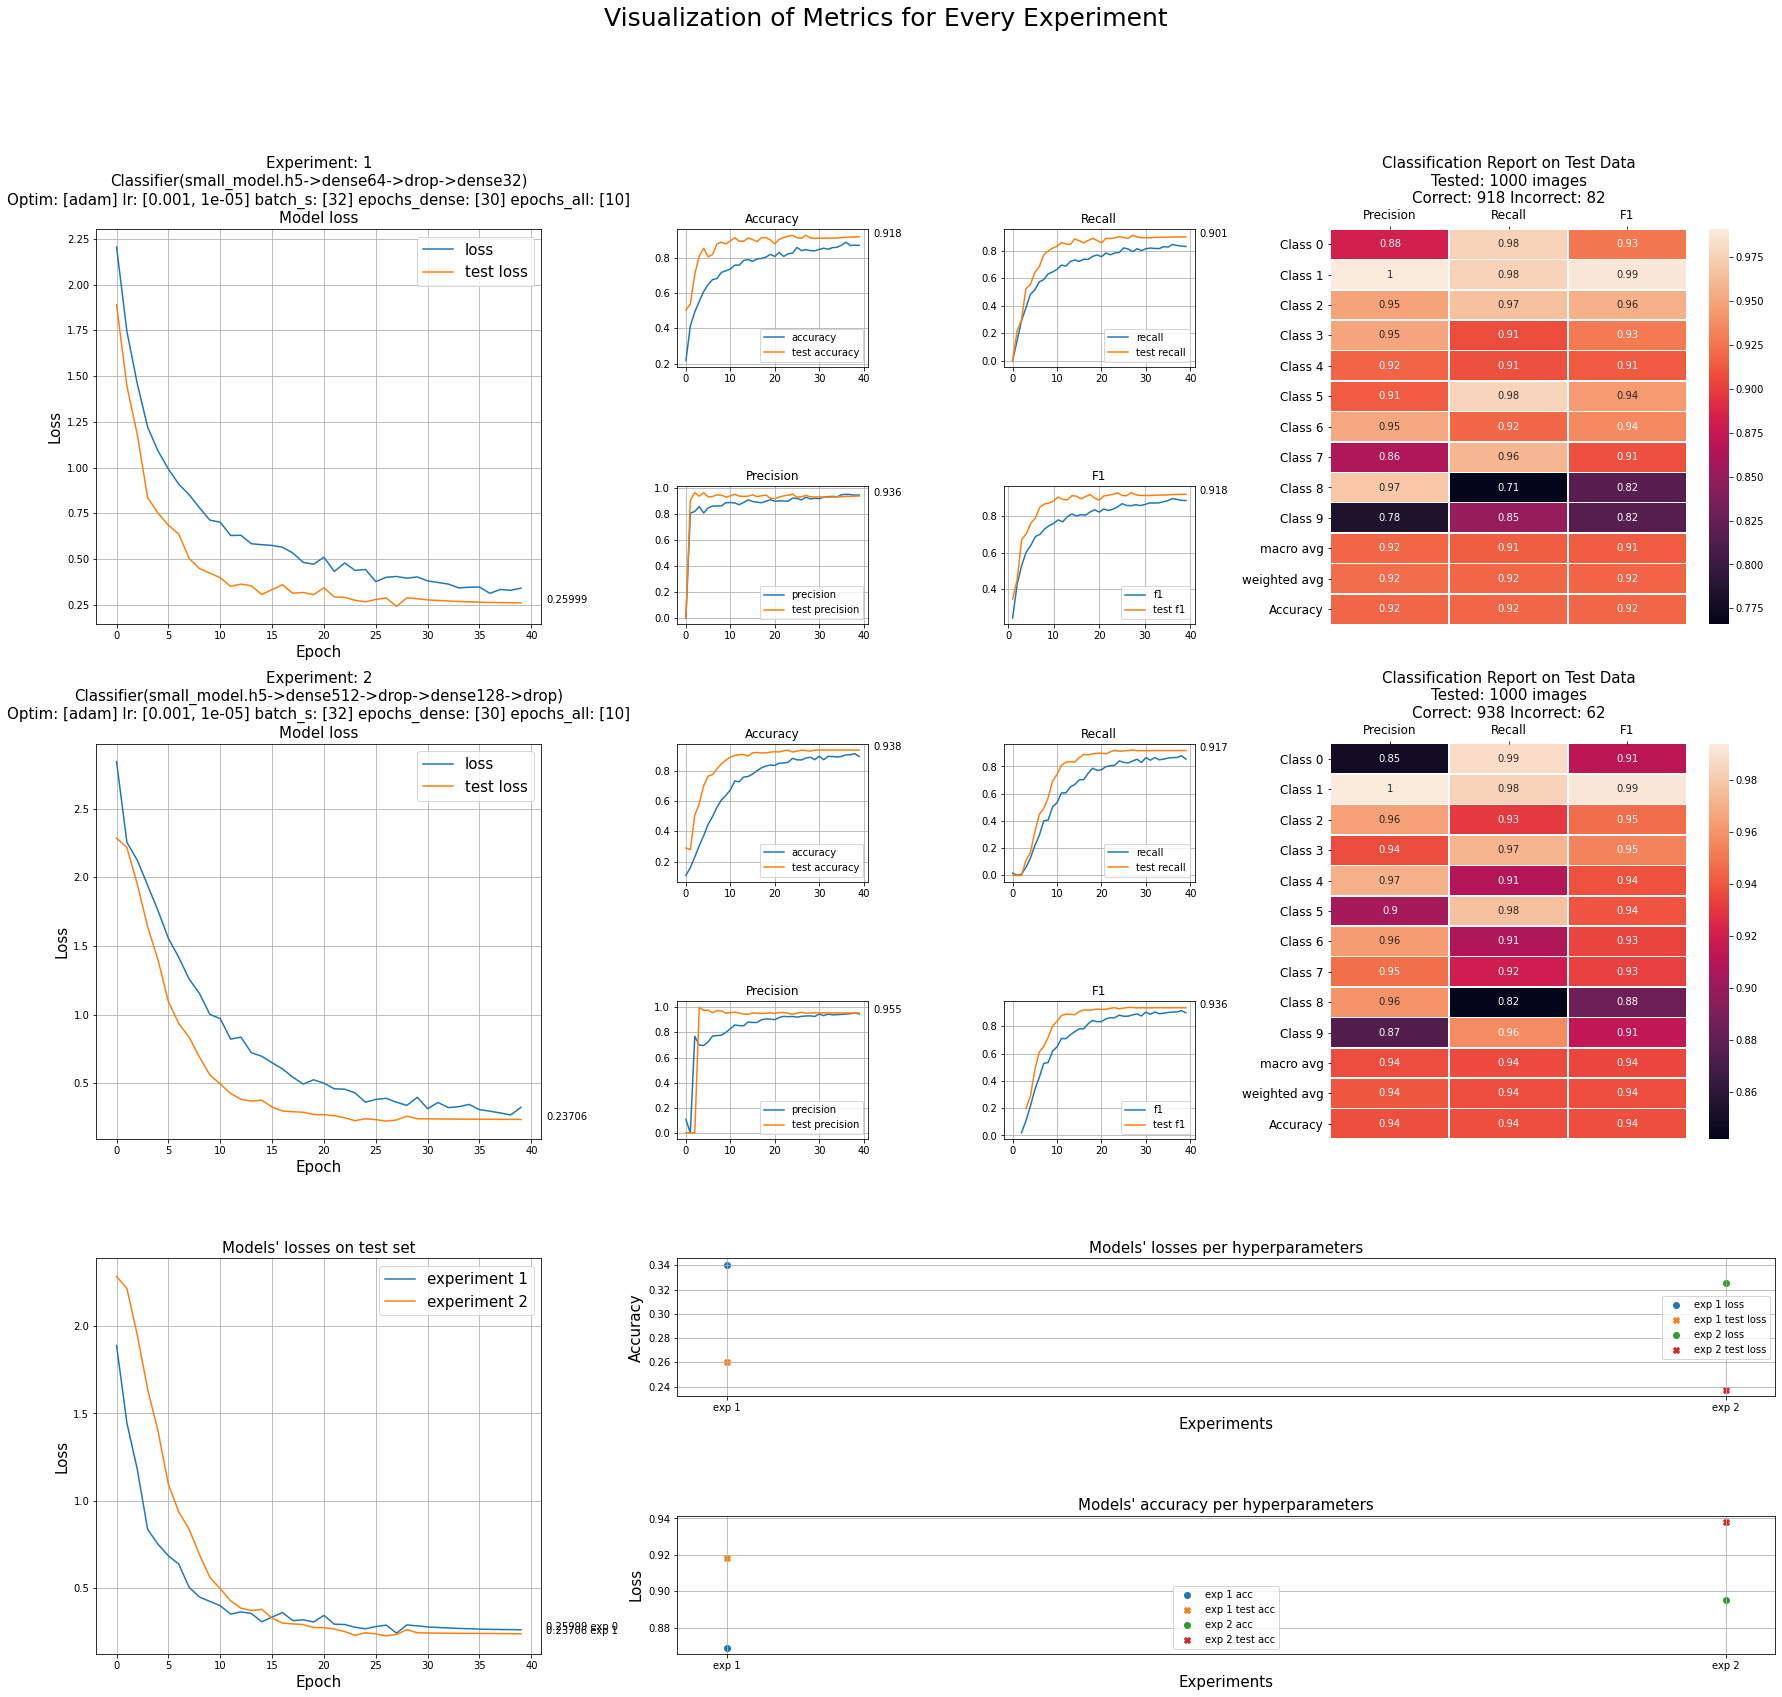

In [42]:
_ = classifier_loss_visualization(classifier_experiment_histories)

82


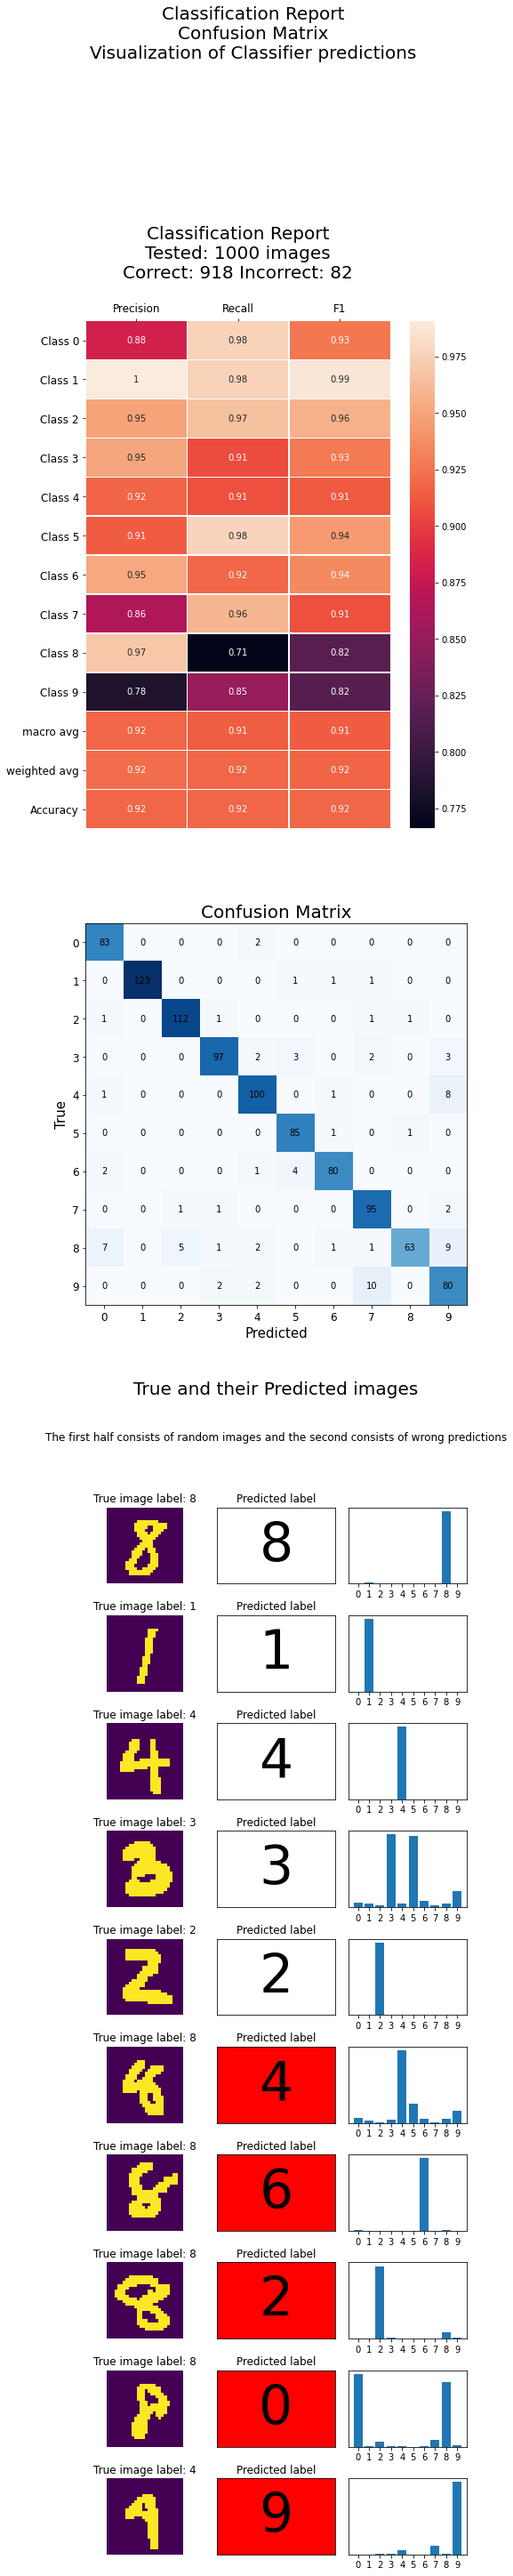

In [43]:
_ = classifier_prediction_visualization(small_model_classifier_history, test_X, test_Y, 10)